## Will be updating the notebook with new Data Visualization Plot and new Prediction and Forecasting Models. Please upvote the kernel if you have liked the work. Also, any kind of suggestion and corrections would be highly appreciated!
 # Stay Safe and follow basic hygiene Practices!

# This notebook has been divided into three sections

### Section 1- Simple time series analysis of covid cases using general forecasting models and ARIMA model with taking any exogenous features into account.

### Section 2- Here the no of confirmed cases has been predicted taking into account the no of tests(extrapolating it five days down the line).

### Section 3- Here the average growth rate of covid cases,recovery rate and death rate has been analyzed and further time series analysis has been performed for prediction of deceased cases and recovered cases.

# Introduction

> This notebook predicts outcome of confirmed cases in India in the forthcoming week.

> Different forecasting methods such as
  
  
  -Simple Exponential Smoothing
  
  -Holt Winter's Method
  
  -SARIMA Model
 
 > have been used in predicting the outcomes.
 
> The data has been taken from www.covid19india.org

> This kernel is an updated version of my previous one

> I would like to thank those who expressed their gratitude by upvoting and people were also 

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-india/case_time_series.csv
/kaggle/input/covid19-india/tested_numbers_icmr_data.csv
/kaggle/input/covid19updated/case_time_series.csv
/kaggle/input/covid12052020/case_time_series.csv
/kaggle/input/covid12052020/tested_numbers_icmr_data.csv
/kaggle/input/updated-testing/tested_numbers_icmr_data.csv
/kaggle/input/testing/tested_numbers_icmr_data.csv


In [4]:
df=pd.read_csv('/kaggle/input/covid12052020/case_time_series.csv')
testing=pd.read_csv('/kaggle/input/covid12052020/tested_numbers_icmr_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
Date               104 non-null object
Daily Confirmed    104 non-null int64
Total Confirmed    104 non-null int64
Daily Recovered    104 non-null int64
Total Recovered    104 non-null int64
Daily Deceased     104 non-null int64
Total Deceased     104 non-null int64
dtypes: int64(6), object(1)
memory usage: 5.8+ KB


In [6]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 13 columns):
Update Time Stamp                        57 non-null object
Total Samples Tested                     52 non-null float64
Total Individuals Tested                 24 non-null float64
Total Tested                             57 non-null int64
Total Positive Cases                     31 non-null object
Tests conducted by Private Labs          3 non-null float64
Sample Reported today                    15 non-null object
Positive cases from samples reported     14 non-null float64
Source                                   52 non-null object
Unnamed: 9                               0 non-null float64
Test positivity rate                     24 non-null object
Individuals Tested Per Confirmed Case    31 non-null float64
Tests Per Confirmed Case                 31 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 5.9+ KB


In [7]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [8]:
df.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
99,08 May,3339,59690,1111,17887,97,1986
100,09 May,3175,62865,1414,19301,115,2101
101,10 May,4311,67176,1669,20970,112,2213
102,11 May,3592,70768,1579,22549,81,2294
103,12 May,3561,74329,1904,24453,120,2414


In [9]:
df['Date'] = df['Date'].str.replace(' ','-')
df['Date'] = df['Date'].str.replace('January','01')
df['Date'] = df['Date'].str.replace('February','02')
df['Date'] = df['Date'].str.replace('March','03')
df['Date'] = df['Date'].str.replace('April','04')
df['Date'] = df['Date'].str.replace('May','05')

In [10]:
df.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
99,08-05-,3339,59690,1111,17887,97,1986
100,09-05-,3175,62865,1414,19301,115,2101
101,10-05-,4311,67176,1669,20970,112,2213
102,11-05-,3592,70768,1579,22549,81,2294
103,12-05-,3561,74329,1904,24453,120,2414


In [11]:
df.loc[:,'Date'] = df.loc[:,'Date']+'2020'

In [12]:
df.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
99,08-05-2020,3339,59690,1111,17887,97,1986
100,09-05-2020,3175,62865,1414,19301,115,2101
101,10-05-2020,4311,67176,1669,20970,112,2213
102,11-05-2020,3592,70768,1579,22549,81,2294
103,12-05-2020,3561,74329,1904,24453,120,2414


In [13]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [14]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0


In [15]:
# Making the date column as index
df.index=df['Date']
df.drop(['Date'],axis=1,inplace=True)

In [16]:
df.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
2020-01-30,1,1,0,0,0,0
2020-01-31,0,1,0,0,0,0
2020-02-01,0,1,0,0,0,0
2020-02-02,1,2,0,0,0,0
2020-02-03,1,3,0,0,0,0


In [17]:
# Setting the frequency to Daily basis.
df=df.asfreq(freq='D')

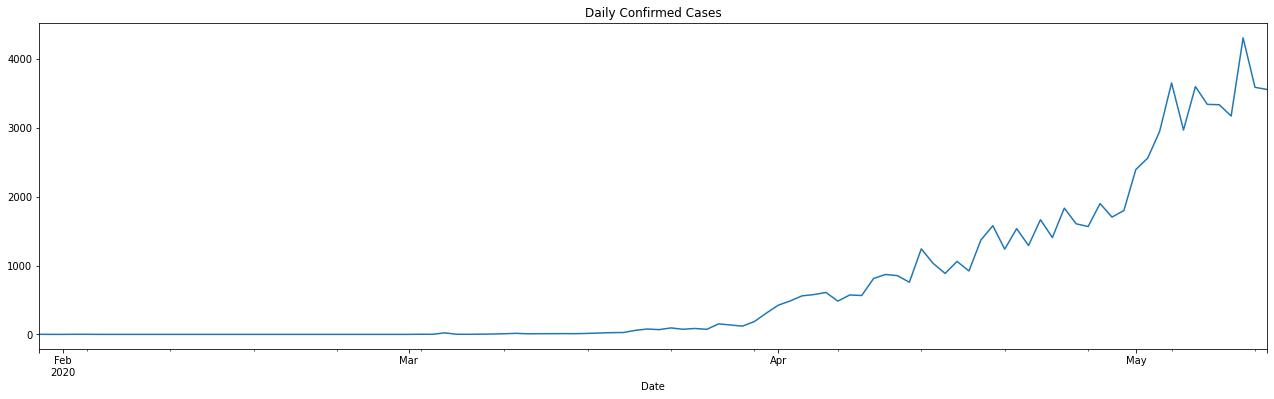

In [18]:
# Plot of Daily Confirmed Cases in India
df['Daily Confirmed'].plot(figsize=(22,6),title='Daily Confirmed Cases');

## ETS Decomposition

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
results = seasonal_decompose(df['Daily Confirmed'])

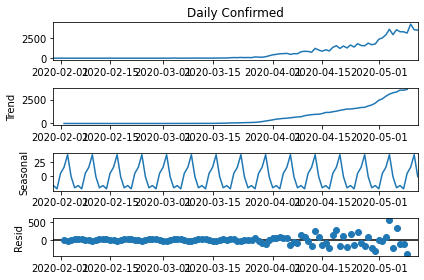

In [21]:
results.plot();

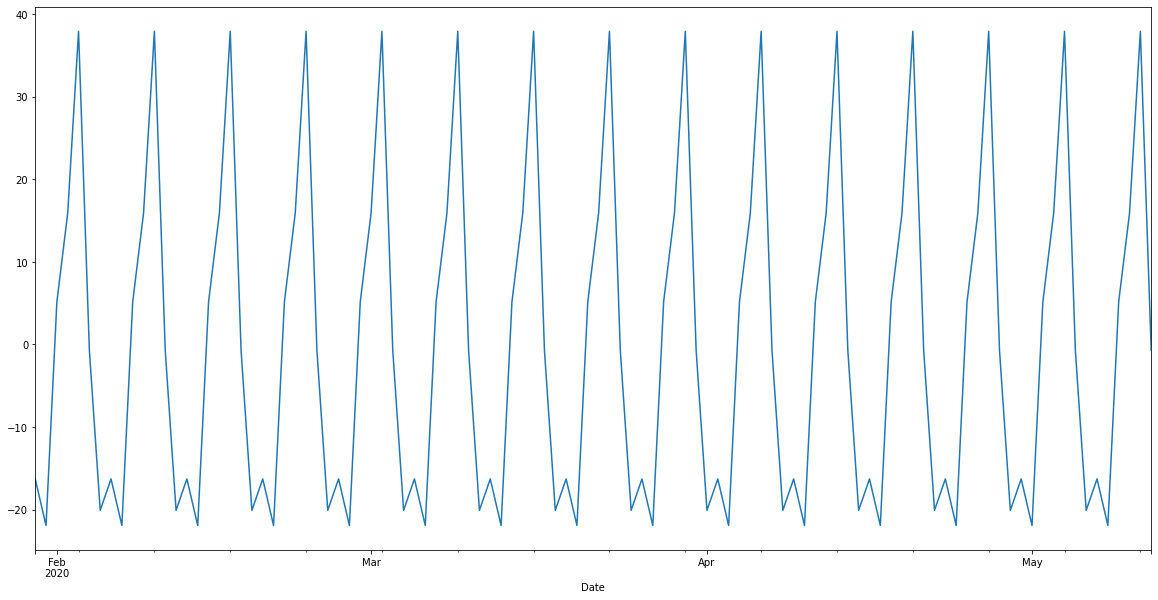

In [22]:
results.seasonal.plot(figsize=(20,10));

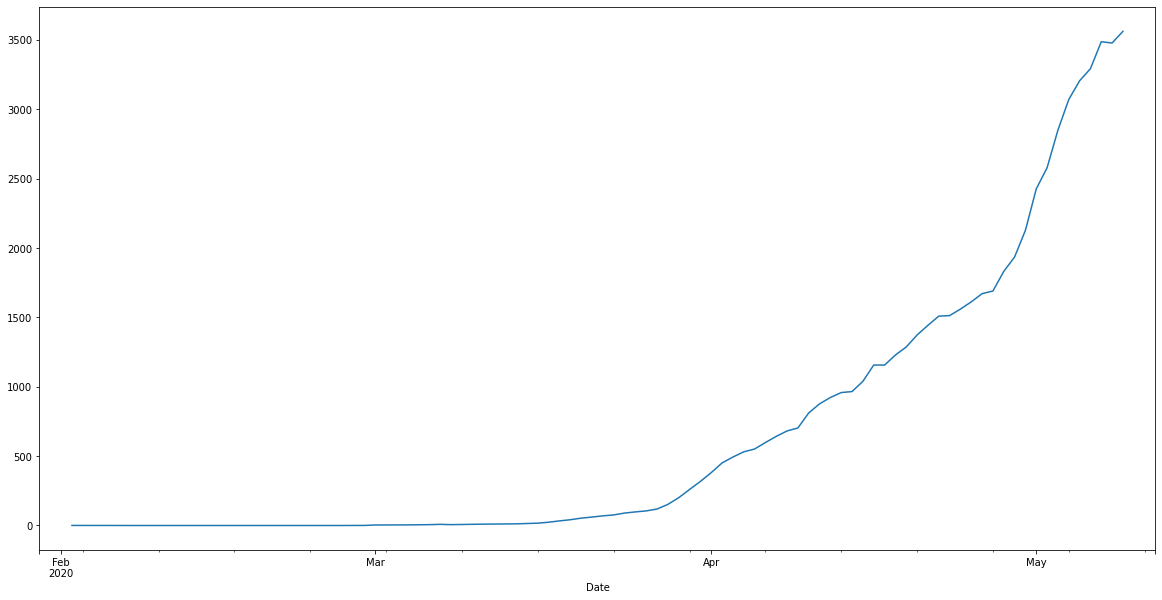

In [23]:
results.trend.plot(figsize=(20,10));

In [24]:
len(df)

104

### Splitting the data into training and testing set

In [25]:
train=df.iloc[:99]
test=df.iloc[99:]

As there were no reported cases in India from 4th February 2020 to 1st March 2020. So the curve isn't strictly increasing as a result we cannot use multiplicative trend or assume seasonality to be multiplicative so we have only used additive trend.

### Simple Exponential Smoothing

In [26]:
# Simple Exponential Smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 5
alpha = 2/(span+1)

df['EWMA5'] = df['Daily Confirmed'].ewm(alpha=alpha,adjust=False).mean()
df['SES5']=SimpleExpSmoothing(df['Daily Confirmed']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5
Date,,,,,,,,
2020-01-30,1,1,0,0,0,0,1.000000,1.000000
2020-01-31,0,1,0,0,0,0,0.666667,0.666667
2020-02-01,0,1,0,0,0,0,0.444444,0.444444
2020-02-02,1,2,0,0,0,0,0.629630,0.629630
2020-02-03,1,3,0,0,0,0,0.753086,0.753086


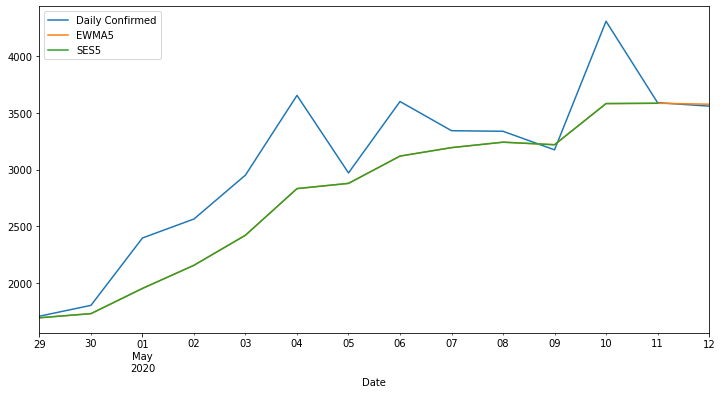

In [27]:
df[['Daily Confirmed','EWMA5','SES5']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### Double Exponential Smoothing

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Double Exponential Smoothing

df['DESadd5'] = ExponentialSmoothing(df['Daily Confirmed'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5
Date,,,,,,,,,
2020-01-30,1,1,0,0,0,0,1.000000,1.000000,1.003116
2020-01-31,0,1,0,0,0,0,0.666667,0.666667,0.505421
2020-02-01,0,1,0,0,0,0,0.444444,0.444444,0.219730
2020-02-02,1,2,0,0,0,0,0.629630,0.629630,0.564969
2020-02-03,1,3,0,0,0,0,0.753086,0.753086,0.766516


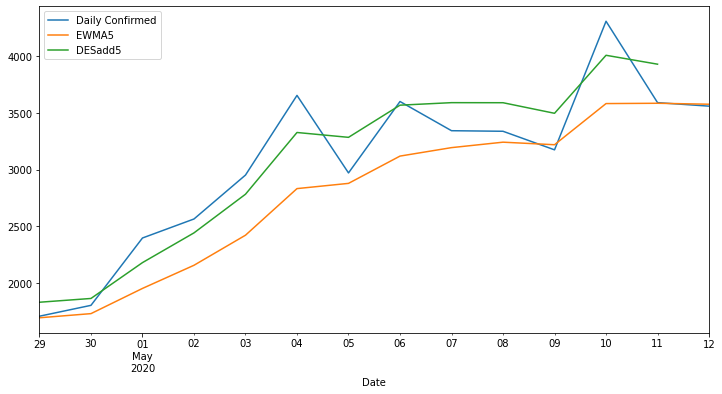

In [29]:
df[['Daily Confirmed','EWMA5','DESadd5']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data than Simple Exponential Smoothing.<br>
We cannot use multiplicative trend as the data is not strictly increasing.

___
## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 


In [30]:
df['TESadd5'] = ExponentialSmoothing(df['Daily Confirmed'],trend='add',seasonal='add',seasonal_periods=5).fit().fittedvalues
df.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5
Date,,,,,,,,,,
2020-01-30,1,1,0,0,0,0,1.000000,1.000000,1.003116,10.824065
2020-01-31,0,1,0,0,0,0,0.666667,0.666667,0.505421,3.619013
2020-02-01,0,1,0,0,0,0,0.444444,0.444444,0.219730,3.188630
2020-02-02,1,2,0,0,0,0,0.629630,0.629630,0.564969,-59.100119
2020-02-03,1,3,0,0,0,0,0.753086,0.753086,0.766516,48.096003


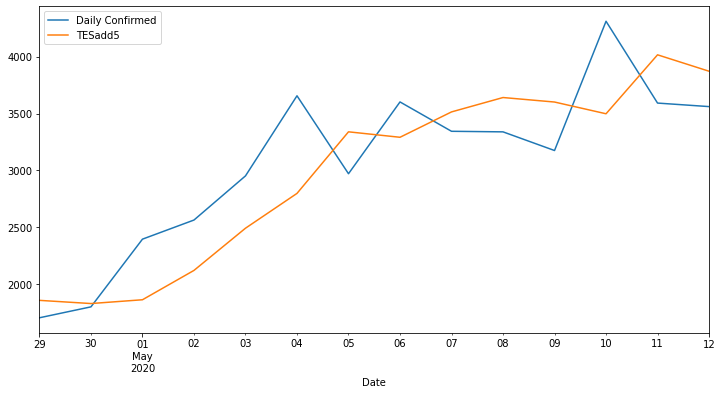

In [31]:
df[['Daily Confirmed','TESadd5']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [32]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [33]:
adf_test(df['Daily Confirmed'])

Augmented Dickey-Fuller Test: 
ADF test statistic       2.858863
p-value                  1.000000
# lags used             13.000000
# observations          90.000000
critical value (1%)     -3.505190
critical value (5%)     -2.894232
critical value (10%)    -2.584210
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [34]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df['Daily Confirmed'],k_diff=1)

adf_test(df['d1'],'')

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.733545
p-value                  0.413917
# lags used             13.000000
# observations          89.000000
critical value (1%)     -3.506057
critical value (5%)     -2.894607
critical value (10%)    -2.584410
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [35]:
from statsmodels.tsa.statespace.tools import diff
df['d2'] = diff(df['Daily Confirmed'],k_diff=2)

adf_test(df['d2'],'')

Augmented Dickey-Fuller Test: 
ADF test statistic      -4.643250
p-value                  0.000107
# lags used             13.000000
# observations          88.000000
critical value (1%)     -3.506944
critical value (5%)     -2.894990
critical value (10%)    -2.584615
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [36]:
pip install pyramid-arima

     |████████████████████████████████| 597 kB 6.6 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [37]:
from pyramid.arima import auto_arima

In [38]:
train=df.iloc[:99]
test=df.iloc[99:]

In [39]:
# Auto Arima Model

stepwise_model = auto_arima(train['Daily Confirmed'], start_p=0, start_q=0, max_p=5, max_q=5,m=5,seasonality=True,
d=2,D=2,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

print(stepwise_model.aic())

Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 2, 1, 5); AIC=1298.940, BIC=1308.803, Fit time=0.422 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 0, 5); AIC=1352.493, BIC=1357.425, Fit time=0.020 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 2, 0, 5); AIC=1271.941, BIC=1281.804, Fit time=0.167 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 1, 5); AIC=1220.207, BIC=1230.070, Fit time=0.426 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 1, 5); AIC=1215.468, BIC=1227.797, Fit time=0.625 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 0, 5); AIC=1246.117, BIC=1255.980, Fit time=0.253 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 2, 5); AIC=1224.206, BIC=1239.001, Fit time=0.736 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 0, 5); AIC=1270.249, BIC=1277.647, Fit time=0.160 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(2, 2, 2, 5); AIC=1237.601, BIC=1254.862, Fit time=1.016 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_o

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
model = SARIMAX(train['Daily Confirmed'],order=(2,2,2),seasonal_order=(2,2,1,5),enforce_invertibility=True)
results = model.fit()
results.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                     Daily Confirmed   No. Observations:                   99
Model:             SARIMAX(2, 2, 2)x(2, 2, [1], 5)   Log Likelihood                -576.485
Date:                             Wed, 13 May 2020   AIC                           1168.970
Time:                                     07:27:13   BIC                           1188.697
Sample:                                 01-30-2020   HQIC                          1176.914
                                      - 05-07-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5230      1.543     -0.987      0.324      -4.547       1.501
ar.L2         -0.5232      0.812     -0.644      0.519      -2.115       1.069
ma.L1          0.0009      8.124      0.000      1.000     -15.922      15.924
ma.L2         -0.9990      3.336     -0.299      0.765      -7.537       5.539
ar.S.L5       -0.7966      0.138     -5.759      0.000      -1.068      -0.525
ar.S.L10      -0.7157      0.112     -6.395      0.000      -0.935      -0.496
ma.S.L5       -0.9939      2.112     -0.471      0.638      -5.134       3.146
sigma2      2.207e+04      0.001      3e+07      0.000    2.21e+04    2.21e+04
===================================================================================
Ljung-Box (Q):                       33.37   Jarque-Bera (JB):                90.44
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):            2806.29   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.23e+24. Standard errors may be unstable.
"""

In [42]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False,typ='levels').rename('SARIMA(2,2,2)(2,2,1,5) Predictions')

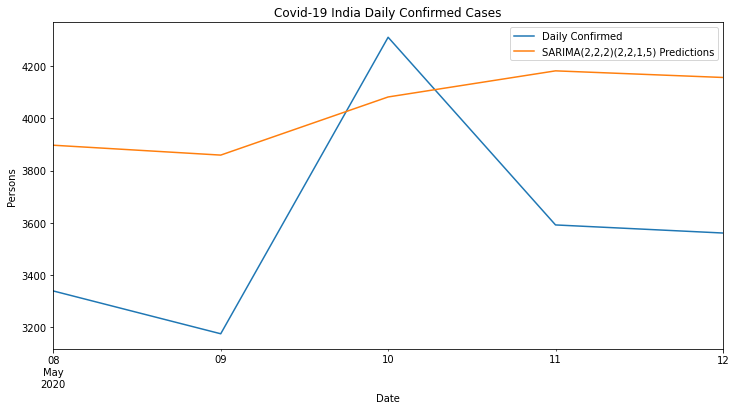

In [43]:
title='Covid-19 India Daily Confirmed Cases'
ylabel='Persons'

ax = test['Daily Confirmed'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [44]:
from statsmodels.tools.eval_measures import rmse,meanabs

error = rmse(test['Daily Confirmed'], predictions)
print(f'SARIMAX(2,2,2)(2,2,1,5) RMSE Error: {error:11.10}')

SARIMAX(2,2,2)(2,2,1,5) RMSE Error: 554.3198659


The rmse is significantly low as compared to previous predictions.

In [45]:
model = SARIMAX(df['Daily Confirmed'],order=(2,2,2),seasonal_order=(2,2,1,5),enforce_invertibility=True)
results = model.fit()
fcast = results.predict(len(df),len(df)+5).rename('SARIMAX(2,2,2)(2,2,1,5) Forecast')

In [46]:
fcast

2020-05-13    3958.064049
2020-05-14    3999.605897
2020-05-15    4077.136264
2020-05-16    4724.616152
2020-05-17    4846.156301
2020-05-18    5155.422953
Freq: D, Name: SARIMAX(2,2,2)(2,2,1,5) Forecast, dtype: float64

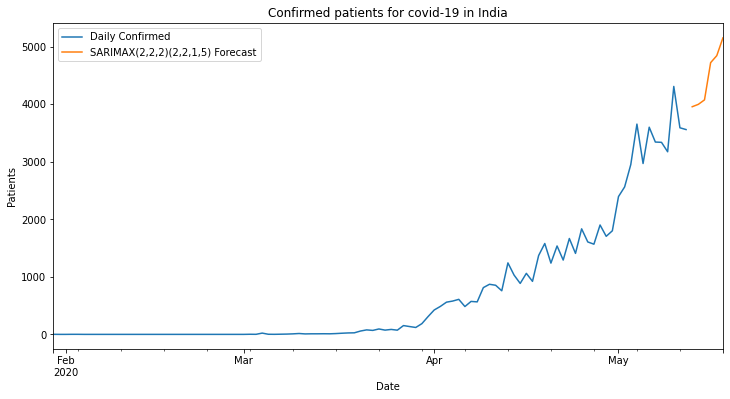

In [47]:
title='Confirmed patients for covid-19 in India'
ylabel='Patients'
ax = df['Daily Confirmed'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [48]:
# Creating a new DataFrame for cumulative sum of confirmed cases in India.

date1 = '2020-01-31'
date2 = '2020-05-17'
mydates = pd.date_range(date1, date2).tolist()
len(mydates)

108

In [49]:
columns=['date','Patients','Total Confirmed']
final = pd.DataFrame(columns=columns)

In [50]:
final['date']=mydates

In [51]:
final.index=final['date']
final.drop(['date'],axis=1,inplace=True)

In [52]:
final['Patients']=df['Daily Confirmed']
final['Total Confirmed']=df['Total Confirmed']

In [53]:
final.tail(7)

,Patients,Total Confirmed
date,,
2020-05-11,3592.0,70768.0
2020-05-12,3561.0,74329.0
2020-05-13,NaN,NaN
2020-05-14,NaN,NaN
2020-05-15,NaN,NaN
2020-05-16,NaN,NaN
2020-05-17,NaN,NaN


In [54]:
len(df)

104

In [55]:
final=final.reset_index()

In [56]:
for i in range(6):
    final.loc[103+i:,'Patients']=fcast[i]

In [57]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
date               108 non-null datetime64[ns]
Patients           108 non-null float64
Total Confirmed    103 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.7 KB


In [58]:
final=final.round()

In [59]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
date               108 non-null datetime64[ns]
Patients           108 non-null float64
Total Confirmed    103 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.7 KB


In [60]:
final.tail(10)

,date,Patients,Total Confirmed
98,2020-05-08,3339.0,59690.0
99,2020-05-09,3175.0,62865.0
100,2020-05-10,4311.0,67176.0
101,2020-05-11,3592.0,70768.0
102,2020-05-12,3561.0,74329.0
103,2020-05-13,3958.0,NaN
104,2020-05-14,4000.0,NaN
105,2020-05-15,4077.0,NaN
106,2020-05-16,4725.0,NaN
107,2020-05-17,4846.0,NaN


In [61]:
for i in range(5):
    final.loc[103+i,'Total Confirmed']=final.loc[103+i-1,'Total Confirmed']+final.loc[103+i,'Patients']

In [62]:
final.tail()

,date,Patients,Total Confirmed
103,2020-05-13,3958.0,78287.0
104,2020-05-14,4000.0,82287.0
105,2020-05-15,4077.0,86364.0
106,2020-05-16,4725.0,91089.0
107,2020-05-17,4846.0,95935.0


## Total predicted confirmed patients would be 95935 by 17/05/2020 if samples tested are not taken into account.

# Section 2- Taking no of tests into account.

In [63]:
testing.head()

,Update Time Stamp,Total Samples Tested,Total Individuals Tested,Total Tested,Total Positive Cases,Tests conducted by Private Labs,Sample Reported today,Positive cases from samples reported,Source,Unnamed: 9,Test positivity rate,Individuals Tested Per Confirmed Case,Tests Per Confirmed Case
0,13/03/2020,6500.0,5900.0,6500,78,NaN,NaN,NaN,Press_Release_ICMR_13March2020.pdf,NaN,1.32%,75.641026,83.333333
1,18/03/2020,13125.0,12235.0,1000,150,NaN,NaN,NaN,ICMR_website_update_18March_6PM_IST.pdf,NaN,1.23%,81.566667,87.500000
2,19/03/2020,14175.0,13285.0,1050,182,NaN,NaN,NaN,ICMR_website_update_19March_6PM_IST.pdf,NaN,1.37%,72.994505,77.884615
3,20/03/2020,15404.0,14514.0,1229,236,NaN,NaN,NaN,ICMR_website_update_20March_6PM_IST.pdf,NaN,1.63%,61.500000,65.271186
4,21/03/2020,16911.0,16021.0,1507,315,NaN,NaN,NaN,ICMR_website_update_21March_6PM_IST.pdf,NaN,1.97%,50.860317,53.685714


In [64]:
testing['Update Time Stamp']=testing['Update Time Stamp'].str.replace('/','-')
testing['Update Time Stamp']=testing['Update Time Stamp'].str.replace(' ','')
testing.head()

,Update Time Stamp,Total Samples Tested,Total Individuals Tested,Total Tested,Total Positive Cases,Tests conducted by Private Labs,Sample Reported today,Positive cases from samples reported,Source,Unnamed: 9,Test positivity rate,Individuals Tested Per Confirmed Case,Tests Per Confirmed Case
0,13-03-2020,6500.0,5900.0,6500,78,NaN,NaN,NaN,Press_Release_ICMR_13March2020.pdf,NaN,1.32%,75.641026,83.333333
1,18-03-2020,13125.0,12235.0,1000,150,NaN,NaN,NaN,ICMR_website_update_18March_6PM_IST.pdf,NaN,1.23%,81.566667,87.500000
2,19-03-2020,14175.0,13285.0,1050,182,NaN,NaN,NaN,ICMR_website_update_19March_6PM_IST.pdf,NaN,1.37%,72.994505,77.884615
3,20-03-2020,15404.0,14514.0,1229,236,NaN,NaN,NaN,ICMR_website_update_20March_6PM_IST.pdf,NaN,1.63%,61.500000,65.271186
4,21-03-2020,16911.0,16021.0,1507,315,NaN,NaN,NaN,ICMR_website_update_21March_6PM_IST.pdf,NaN,1.97%,50.860317,53.685714


In [65]:
testing1=testing[['Update Time Stamp','Total Tested']]
testing1=testing1.rename(columns={'Update Time Stamp':'Date'})
testing1['Date']=pd.to_datetime(testing1['Date'],format='%d-%m-%Y')
testing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
Date            57 non-null datetime64[ns]
Total Tested    57 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB


In [66]:
testing1=testing1[1:]

In [67]:
testing1=testing1.reset_index()

In [68]:
testing1.drop(['index'],axis=1,inplace=True)

## Extrapolating the no of tests five days down the line.

In [69]:
testing1['dayofweek']=testing1['Date'].dt.dayofweek
testing1.head()

,Date,Total Tested,dayofweek
0,2020-03-18,1000,2
1,2020-03-19,1050,3
2,2020-03-20,1229,4
3,2020-03-21,1507,5
4,2020-03-22,1216,6


In [70]:
testing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
Date            56 non-null datetime64[ns]
Total Tested    56 non-null int64
dayofweek       56 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.4 KB


In [71]:
train=testing1[:51]
test=testing1[51:]

### ETS decomposition of testing data.

In [72]:
testing1.index=testing1['Date']
testing1.drop(['Date'],axis=1,inplace=True)

In [73]:
results = seasonal_decompose(testing1['Total Tested'])

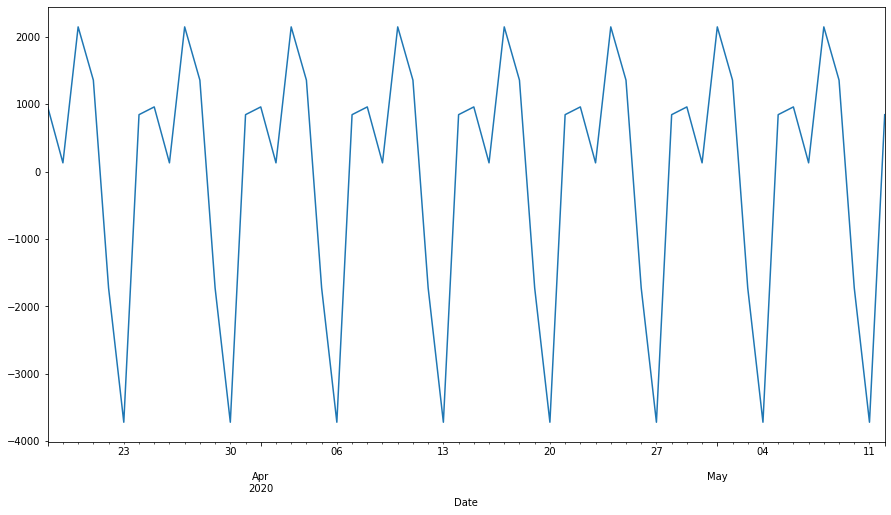

In [74]:
results.seasonal.plot(figsize=(15,8));

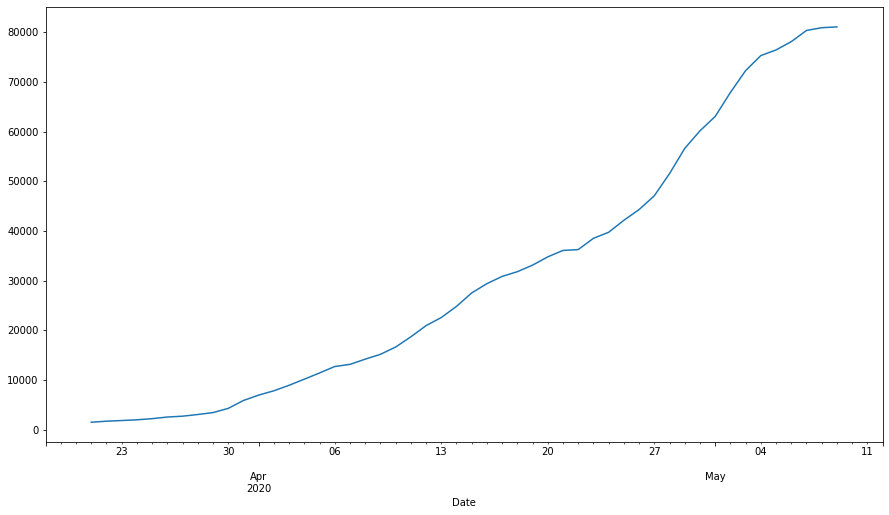

In [75]:
results.trend.plot(figsize=(15,8));

Simple Exponential Smoothing

In [76]:
# Simple Exponential Smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 7
alpha = 2/(span+1)

testing1['EWMA7'] = testing1['Total Tested'].ewm(alpha=alpha,adjust=False).mean()
testing1['SES7']=SimpleExpSmoothing(testing1['Total Tested']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
testing1.head()

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,Total Tested,dayofweek,EWMA7,SES7
Date,,,,
2020-03-18,1000,2,1000.000000,1000.000000
2020-03-19,1050,3,1012.500000,1012.500000
2020-03-20,1229,4,1066.625000,1066.625000
2020-03-21,1507,5,1176.718750,1176.718750
2020-03-22,1216,6,1186.539062,1186.539062


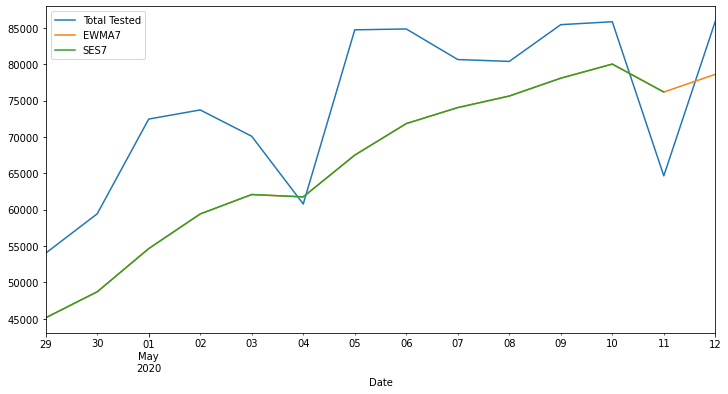

In [77]:
testing1[['Total Tested','EWMA7','SES7']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Double Exponential Smoothing

In [78]:
# Double Exponential Smoothing

testing1['DESadd7'] = ExponentialSmoothing(testing1['Total Tested'], trend='add').fit().fittedvalues.shift(-1)
testing1.head()

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,Total Tested,dayofweek,EWMA7,SES7,DESadd7
Date,,,,,
2020-03-18,1000,2,1000.000000,1000.000000,3131.922877
2020-03-19,1050,3,1012.500000,1012.500000,3523.953484
2020-03-20,1229,4,1066.625000,1066.625000,3806.958403
2020-03-21,1507,5,1176.718750,1176.718750,4087.401884
2020-03-22,1216,6,1186.539062,1186.539062,4075.389648


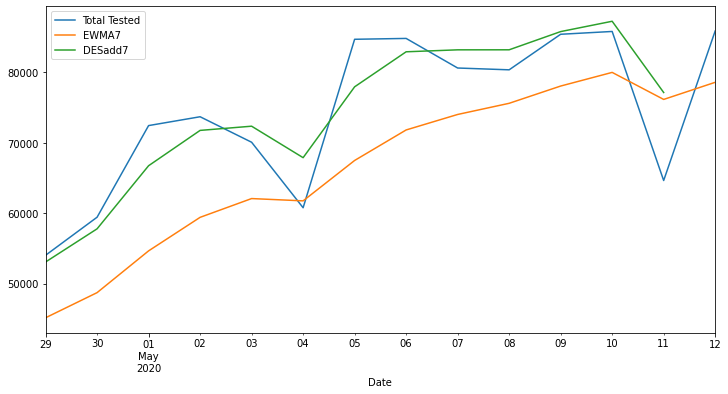

In [79]:
testing1[['Total Tested','EWMA7','DESadd7']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data than Simple Exponential Smoothing.
Let's see if using a multiplicative trend adjustment helps.

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


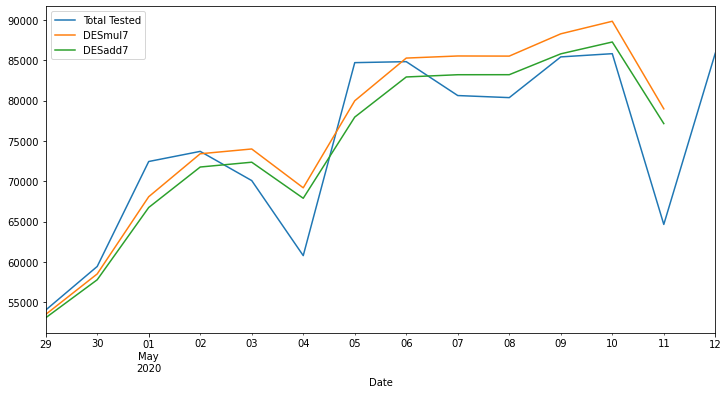

In [80]:
testing1['DESmul7'] = ExponentialSmoothing(testing1['Total Tested'], trend='mul').fit().fittedvalues.shift(-1)
testing1.head()
testing1[['Total Tested','DESmul7','DESadd7']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Triple Exponential Smoothing

Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


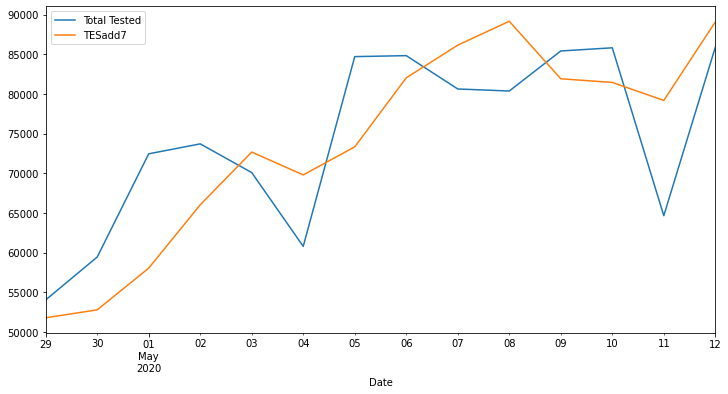

In [81]:
testing1['TESadd7'] = ExponentialSmoothing(testing1['Total Tested'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
testing1.head()
testing1[['Total Tested','TESadd7']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


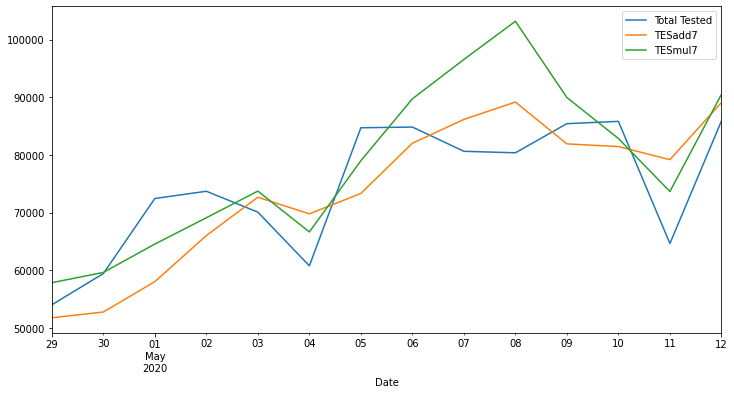

In [82]:
testing1['TESmul7'] = ExponentialSmoothing(testing1['Total Tested'],trend='mul',seasonal='mul',seasonal_periods=7).fit().fittedvalues
testing1.head()
testing1[['Total Tested','TESadd7','TESmul7']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [83]:
testing1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2020-03-18 to 2020-05-12
Data columns (total 8 columns):
Total Tested    56 non-null int64
dayofweek       56 non-null int64
EWMA7           56 non-null float64
SES7            55 non-null float64
DESadd7         55 non-null float64
DESmul7         55 non-null float64
TESadd7         56 non-null float64
TESmul7         56 non-null float64
dtypes: float64(6), int64(2)
memory usage: 3.9 KB


In [84]:
train=testing1.iloc[:51]
test=testing1.iloc[51:]

In [85]:
fitted_model = ExponentialSmoothing(train['Total Tested'],trend='add').fit()

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [86]:
test_predictions = fitted_model.forecast(5).rename('Forecast')

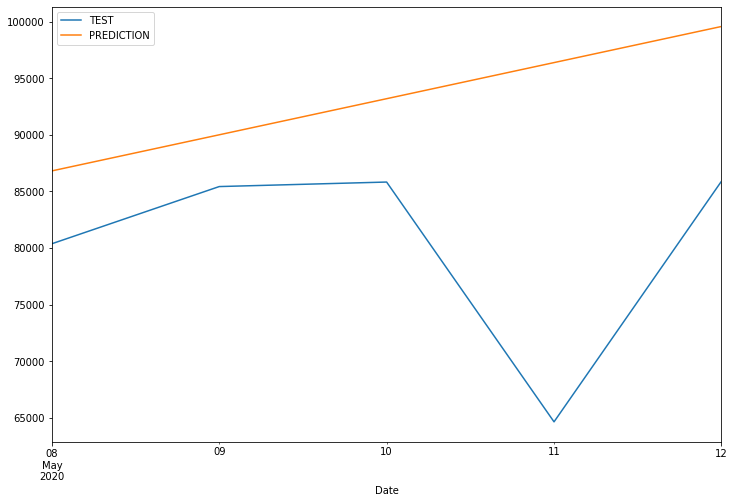

In [87]:
test['Total Tested'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')

In [88]:
# Checking the RMSE for Double exponential exponential smoothing.

from statsmodels.tools.eval_measures import rmse,meanabs

print(rmse(test['Total Tested'],test_predictions))

16183.49295391668


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


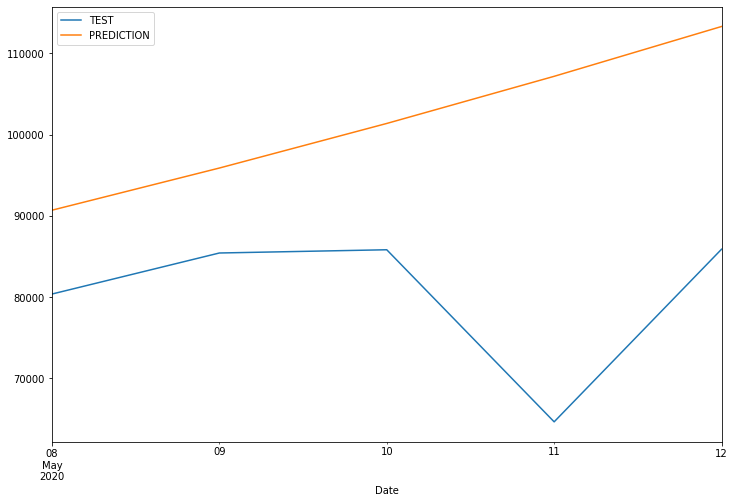

In [89]:
fitted_model = ExponentialSmoothing(train['Total Tested'],trend='mul').fit()
test_predictions = fitted_model.forecast(5).rename('Forecast')
test['Total Tested'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [90]:
print(rmse(test['Total Tested'],test_predictions))

24558.679570957785


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


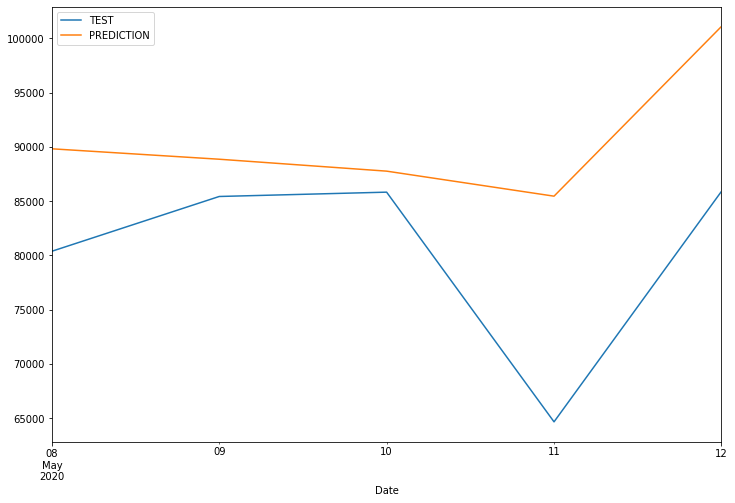

In [91]:
fitted_model = ExponentialSmoothing(train['Total Tested'],trend='add',seasonal='add',seasonal_periods=7).fit()
test_predictions = fitted_model.forecast(5).rename('Forecast')
test['Total Tested'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [92]:
print(rmse(test['Total Tested'],test_predictions))

12399.513442578123


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


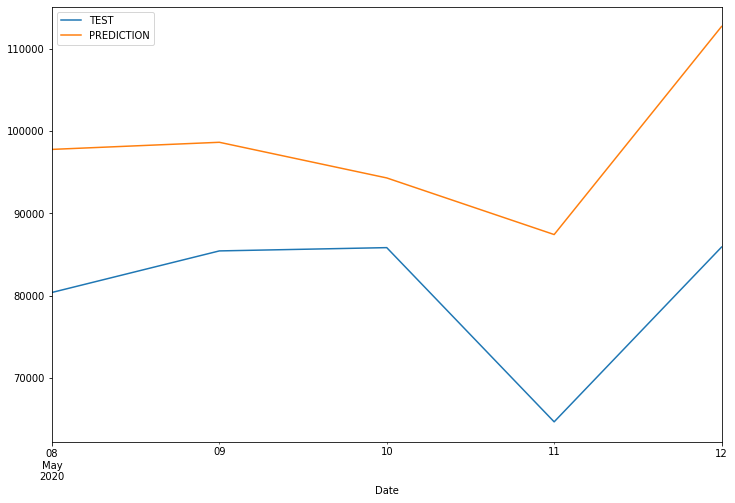

In [93]:
fitted_model = ExponentialSmoothing(train['Total Tested'],trend='mul',seasonal='mul',seasonal_periods=7).fit()
test_predictions = fitted_model.forecast(5).rename('Forecast')
test['Total Tested'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [94]:
print(rmse(test['Total Tested'],test_predictions))

18896.617980213134


RMSE is too high so going for ARIMA Model.

In [95]:
# Checking for stationarity
adf_test(testing1['Total Tested'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -0.146651
p-value                  0.944589
# lags used              7.000000
# observations          48.000000
critical value (1%)     -3.574589
critical value (5%)     -2.923954
critical value (10%)    -2.600039
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [96]:
testing1['d1'] = diff(testing1['Total Tested'],k_diff=1)

adf_test(testing1['d1'],'')

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.950515
p-value                  0.308683
# lags used              6.000000
# observations          48.000000
critical value (1%)     -3.574589
critical value (5%)     -2.923954
critical value (10%)    -2.600039
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [97]:
testing1['d2'] = diff(testing1['Total Tested'],k_diff=2)

adf_test(testing1['d2'],'')

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.972180e+00
p-value                 8.608427e-10
# lags used             5.000000e+00
# observations          4.800000e+01
critical value (1%)    -3.574589e+00
critical value (5%)    -2.923954e+00
critical value (10%)   -2.600039e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [98]:
stepwise_model = auto_arima(train['Total Tested'], start_p=0, start_q=0, max_p=5, max_q=5, m=7,start_P=0, seasonal=True,
d=2, D=2, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True,exogenous=train[['dayofweek']])

print(stepwise_model.aic())

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 1, 7); AIC=749.873, BIC=756.095, Fit time=0.313 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 0, 7); AIC=769.906, BIC=774.572, Fit time=0.018 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 2, 0, 7); AIC=746.667, BIC=754.444, Fit time=0.416 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 1, 7); AIC=725.043, BIC=732.819, Fit time=0.510 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 1, 7); AIC=726.554, BIC=735.886, Fit time=0.599 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 0, 7); AIC=743.139, BIC=749.360, Fit time=0.127 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 2, 7); AIC=731.093, BIC=740.425, Fit time=0.706 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 2, 7); AIC=733.404, BIC=744.292, Fit time=0.983 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 2, 1, 7); AIC=730.365, BIC=739.697, Fit time=0.624 seconds
Fit ARIMA: order=(0, 2, 2) seasonal_order=(0, 2, 1, 7);

In [99]:
model = SARIMAX(train['Total Tested'],order=(0,2,1),seasonal_order=(0,2,1,7),exogenous=train[['dayofweek']],enforce_invertibility=True)
results = model.fit()
results.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      Total Tested   No. Observations:                   51
Model:             SARIMAX(0, 2, 1)x(0, 2, 1, 7)   Log Likelihood                -357.618
Date:                           Wed, 13 May 2020   AIC                            721.236
Time:                                   07:27:25   BIC                            725.902
Sample:                               03-18-2020   HQIC                           722.847
                                    - 05-07-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9999      2.286     -0.437      0.662      -5.479       3.480
ma.S.L7       -0.9732      2.356     -0.413      0.680      -5.591       3.645
sigma2      3.511e+07   6.59e-08   5.33e+14      0.000    3.51e+07    3.51e+07
===================================================================================
Ljung-Box (Q):                       32.02   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.57   Prob(JB):                         0.62
Heteroskedasticity (H):               7.45   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.84e+31. Standard errors may be unstable.
"""

In [100]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False,typ='levels',exogenous=test[['dayofweek']]).rename('SARIMA(0,2,1)(0,2,1,7) Predictions')

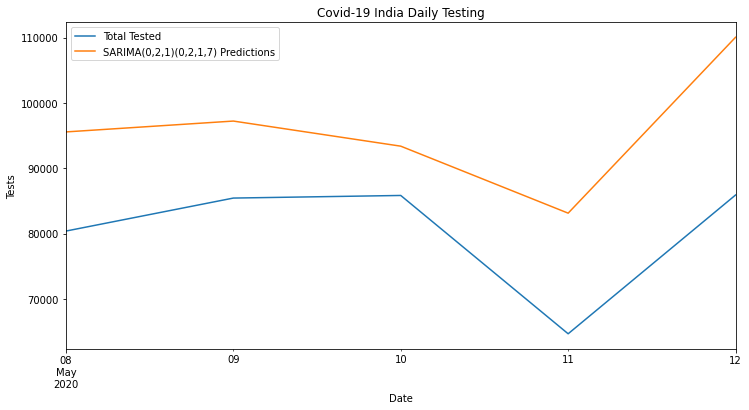

In [101]:
title='Covid-19 India Daily Testing'
ylabel='Tests'

ax = test['Total Tested'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [102]:
error = rmse(test['Total Tested'], predictions)
print(f'SARIMAX(1,1,1)(0,1,2,7) RMSE Error: {error:11.10}')

SARIMAX(1,1,1)(0,1,2,7) RMSE Error: 16433.99451


Moving ahead with arima model as it is more reliable method than simple exponential smoothing.

In [103]:
testing1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2020-03-18 to 2020-05-12
Data columns (total 10 columns):
Total Tested    56 non-null int64
dayofweek       56 non-null int64
EWMA7           56 non-null float64
SES7            55 non-null float64
DESadd7         55 non-null float64
DESmul7         55 non-null float64
TESadd7         56 non-null float64
TESmul7         56 non-null float64
d1              55 non-null float64
d2              54 non-null float64
dtypes: float64(8), int64(2)
memory usage: 4.8 KB


In [104]:
date1 = '2020-05-13'
date2 = '2020-05-17'
mydates = pd.date_range(date1, date2).tolist()
len(mydates)
a=pd.DataFrame()
a['Date']=mydates
a['dayofweek']=a['Date'].dt.dayofweek

In [105]:
model = SARIMAX(testing1['Total Tested'],order=(0,2,1),seasonal_order=(0,2,1,7),enforce_invertibility=True,exogenous=testing1[['dayofweek']])
results = model.fit()
fcast = results.predict(len(testing1),len(testing1)+5,exogenous=a[['dayofweek']]).rename('SARIMAX(0,2,1)(0,2,1,7) Forecast')

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


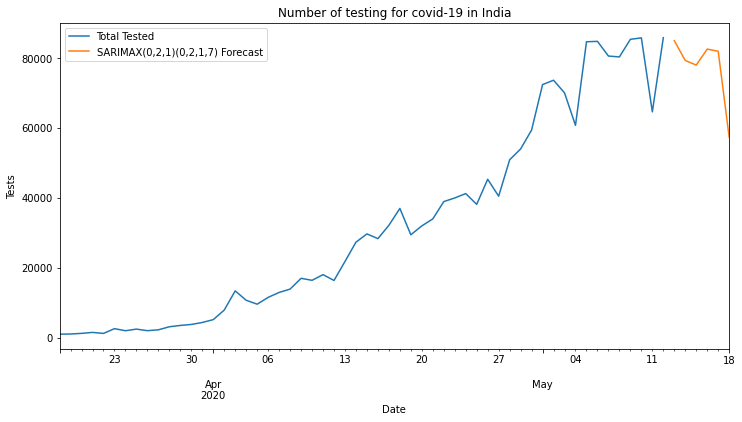

In [106]:
title='Number of testing for covid-19 in India'
ylabel='Tests'
ax = testing1['Total Tested'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [107]:
date1 = '2020-03-18'
date2 = '2020-05-17'
mydates = pd.date_range(date1, date2).tolist()
len(mydates)

61

In [108]:
columns=['Date','Tests','dayofweek']
tests = pd.DataFrame(columns=columns)

In [109]:
tests['Date']=mydates

In [110]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
Date         61 non-null datetime64[ns]
Tests        0 non-null object
dayofweek    0 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ KB


In [111]:
tests.index=tests['Date']
tests.drop(['Date'],axis=1,inplace=True)
tests['Tests']=testing1['Total Tested']

In [112]:
tests['dayofweek']=tests.index.dayofweek

In [113]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2020-03-18 to 2020-05-17
Data columns (total 2 columns):
Tests        56 non-null float64
dayofweek    61 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [114]:
len(testing1)

56

In [115]:
tests=tests.reset_index()

In [116]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
Date         61 non-null datetime64[ns]
Tests        56 non-null float64
dayofweek    61 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.6 KB


In [117]:
for i in range(5):
    tests.loc[56+i:,'Tests']=fcast[i]
tests.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
Date         61 non-null datetime64[ns]
Tests        61 non-null float64
dayofweek    61 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.6 KB


In [118]:
tests.index=tests['Date']
tests.drop(['Date'],axis=1,inplace=True)

In [119]:
tests=tests.round()

In [120]:
tests.tail()

,Tests,dayofweek
Date,,
2020-05-13,85034.0,2
2020-05-14,79354.0,3
2020-05-15,78044.0,4
2020-05-16,82617.0,5
2020-05-17,82001.0,6


### Now as we have our estimated tests a week ahead let's predict the total confirmed cases a week ahead taking the number of tests into account.

Merging the tests dataframe and df dataframe for getting no of tests done.

In [121]:
df1=df['2020-03-18':]
df1=df1.reset_index()
df1.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2
0,2020-03-18,25,171,0,15,0,3,17.797939,17.797939,21.967568,-42.937583,5.0,-1.0
1,2020-03-19,27,198,5,20,1,4,20.865293,20.865293,25.669444,68.754631,2.0,-3.0
2,2020-03-20,58,256,3,23,0,4,33.243529,33.243529,43.396613,35.327227,31.0,29.0
3,2020-03-21,78,334,0,23,0,4,48.162352,48.162352,63.565304,45.641503,20.0,-11.0
4,2020-03-22,69,403,0,23,3,7,55.108235,55.108235,70.343506,65.842493,-9.0,-29.0


In [122]:
covidtest=tests[:'2020-05-12']
exog_test=tests['2020-05-12':]
covidtest=covidtest.reset_index()
exog_test=exog_test.reset_index()

In [123]:
covidtest.tail()

,Date,Tests,dayofweek
51,2020-05-08,80375.0,4
52,2020-05-09,85425.0,5
53,2020-05-10,85824.0,6
54,2020-05-11,64651.0,0
55,2020-05-12,85891.0,1


In [124]:
df1.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2
51,2020-05-08,3339,59690,1111,17887,97,1986,3242.669015,3242.669015,3591.293179,3640.722657,-5.0,253.0
52,2020-05-09,3175,62865,1414,19301,115,2101,3220.112676,3220.112676,3497.868962,3601.157133,-164.0,-159.0
53,2020-05-10,4311,67176,1669,20970,112,2213,3583.741784,3583.741784,4010.437625,3497.950773,1136.0,1300.0
54,2020-05-11,3592,70768,1579,22549,81,2294,3586.494523,3586.494523,3931.767589,4016.142099,-719.0,-1855.0
55,2020-05-12,3561,74329,1904,24453,120,2414,3577.996349,NaN,NaN,3871.856637,-31.0,688.0


In [125]:
df_clean=pd.merge(df1,covidtest,on='Date',how='inner')
df_clean.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2,Tests,dayofweek
0,2020-03-18,25,171,0,15,0,3,17.797939,17.797939,21.967568,-42.937583,5.0,-1.0,1000.0,2
1,2020-03-19,27,198,5,20,1,4,20.865293,20.865293,25.669444,68.754631,2.0,-3.0,1050.0,3
2,2020-03-20,58,256,3,23,0,4,33.243529,33.243529,43.396613,35.327227,31.0,29.0,1229.0,4
3,2020-03-21,78,334,0,23,0,4,48.162352,48.162352,63.565304,45.641503,20.0,-11.0,1507.0,5
4,2020-03-22,69,403,0,23,3,7,55.108235,55.108235,70.343506,65.842493,-9.0,-29.0,1216.0,6


In [126]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 15 columns):
Date               56 non-null datetime64[ns]
Daily Confirmed    56 non-null int64
Total Confirmed    56 non-null int64
Daily Recovered    56 non-null int64
Total Recovered    56 non-null int64
Daily Deceased     56 non-null int64
Total Deceased     56 non-null int64
EWMA5              56 non-null float64
SES5               55 non-null float64
DESadd5            55 non-null float64
TESadd5            56 non-null float64
d1                 56 non-null float64
d2                 56 non-null float64
Tests              56 non-null float64
dayofweek          56 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(7)
memory usage: 7.0 KB


In [127]:
train=df_clean[:51]
test=df_clean[51:]

In [128]:
adf_test(df_clean['Daily Confirmed'])

Augmented Dickey-Fuller Test: 
ADF test statistic       1.167414
p-value                  0.995753
# lags used              2.000000
# observations          53.000000
critical value (1%)     -3.560242
critical value (5%)     -2.917850
critical value (10%)    -2.596796
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [129]:
df_clean['d1'] = diff(df_clean['Daily Confirmed'],k_diff=1)


adf_test(df_clean['d1'],'')

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.262682e+01
p-value                 1.535166e-23
# lags used             0.000000e+00
# observations          5.400000e+01
critical value (1%)    -3.557709e+00
critical value (5%)    -2.916770e+00
critical value (10%)   -2.596222e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [130]:
# Auto Arima Model

stepwise_model = auto_arima(train['Daily Confirmed'], start_p=0, start_q=0, max_p=5, max_q=5, m=5,start_P=0, seasonal=True,
d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True,exogenous=train[['Tests','dayofweek','Daily Recovered'
                                                                                                 ,'Daily Deceased']])

print(stepwise_model.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 5); AIC=632.493, BIC=645.139, Fit time=0.395 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 5); AIC=648.629, BIC=659.469, Fit time=0.078 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 5); AIC=635.319, BIC=649.772, Fit time=0.485 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 5); AIC=637.617, BIC=652.071, Fit time=0.452 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 5); AIC=636.907, BIC=651.360, Fit time=0.490 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 5); AIC=633.234, BIC=647.687, Fit time=0.568 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 5); AIC=639.458, BIC=655.717, Fit time=0.666 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 5); AIC=630.295, BIC=644.748, Fit time=0.465 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 5); AIC=638.068, BIC=654.328, Fit time=0.520 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 5);

In [131]:
model = SARIMAX(train['Daily Confirmed'],order=(1,1,0),seasonal_order=(0,1,1,5),enforce_invertibility=True,
                exogenous=train[['Daily Recovered','Daily Deceased','Tests','dayofweek']])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                     Daily Confirmed   No. Observations:                   51
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 5)   Log Likelihood                -311.247
Date:                             Wed, 13 May 2020   AIC                            628.494
Time:                                     07:27:35   BIC                            633.914
Sample:                                          0   HQIC                           630.514
                                              - 51                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4914      0.117     -4.215      0.000      -0.720      -0.263
ma.S.L5       -0.6855      0.243     -2.827      0.005      -1.161      -0.210
sigma2      5.564e+04   9901.590      5.619      0.000    3.62e+04     7.5e+04
===================================================================================
Ljung-Box (Q):                       26.69   Jarque-Bera (JB):                17.53
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              17.22   Skew:                             1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False,typ='levels',
                              exogenous=test[['Daily Recovered','Daily Deceased','Tests','dayofweek']]).rename('SARIMA(1,1,0)(0,1,1,5) Predictions')

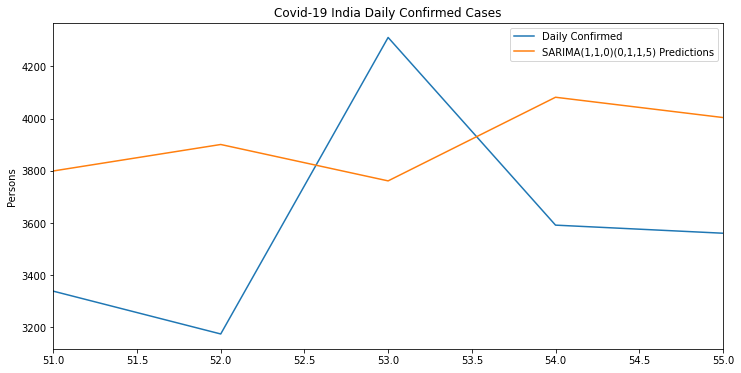

In [133]:
title='Covid-19 India Daily Confirmed Cases'
ylabel='Persons'

ax = test['Daily Confirmed'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [134]:
from statsmodels.tools.eval_measures import rmse,meanabs

error = rmse(test['Daily Confirmed'], predictions)
print(f'SARIMAX(1,1,0)(0,1,1,5) RMSE Error: {error:11.10}')

SARIMAX(1,1,0)(0,1,1,5) RMSE Error: 543.6035057


In [135]:
model = SARIMAX(df_clean['Daily Confirmed'],order=(1,1,0),seasonal_order=(0,1,1,5),enforce_invertibility=True,
                exogenous=df_clean[['Daily Recovered','Daily Deceased','Tests','dayofweek']])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                     Daily Confirmed   No. Observations:                   56
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 5)   Log Likelihood                -356.906
Date:                             Wed, 13 May 2020   AIC                            719.811
Time:                                     07:27:35   BIC                            725.548
Sample:                                          0   HQIC                           721.996
                                              - 56                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4945      0.109     -4.517      0.000      -0.709      -0.280
ma.S.L5       -0.9986     19.172     -0.052      0.958     -38.576      36.579
sigma2      7.386e+04   1.41e+06      0.052      0.958   -2.69e+06    2.84e+06
===================================================================================
Ljung-Box (Q):                       34.54   Jarque-Bera (JB):                28.07
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):              25.88   Skew:                             1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
start=len(df_clean)
end=len(df_clean)+5
predictions = results.predict(start=start, end=end, dynamic=False,typ='levels',exogenous=exog_test[['Tests','dayofweek']]).rename('SARIMA(1,1,0)(0,1,1,5) Predictions')

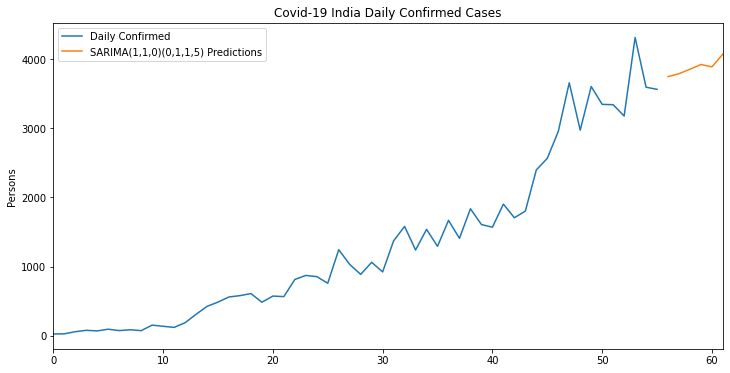

In [137]:
title='Covid-19 India Daily Confirmed Cases'
ylabel='Persons'

ax = df_clean['Daily Confirmed'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [138]:
predictions

56    3744.830316
57    3787.229333
58    3852.141663
59    3920.625446
60    3885.482494
61    4071.361360
Name: SARIMA(1,1,0)(0,1,1,5) Predictions, dtype: float64

In [139]:
# Creating a new DataFrame for cumulative sum of confirmed cases in India.

date1 = '2020-03-18'
date2 = '2020-05-17'
mydates = pd.date_range(date1, date2).tolist()
len(mydates)

61

In [140]:
columns=['date','Patients','Total Confirmed','Tests']
final = pd.DataFrame(columns=columns)

In [141]:
final['date']=mydates
final['Patients']=df_clean['Daily Confirmed']
final['Total Confirmed']=df_clean['Total Confirmed']

In [142]:
final['Tests']=df_clean['Tests']

In [143]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
date               61 non-null datetime64[ns]
Patients           56 non-null float64
Total Confirmed    56 non-null float64
Tests              56 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 KB


In [144]:
final.loc[56:,'Patients']=predictions

In [145]:
for i in range(5):
    final.loc[56+i,'Tests']=exog_test.loc[i+1,'Tests']

In [146]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
date               61 non-null datetime64[ns]
Patients           61 non-null float64
Total Confirmed    56 non-null float64
Tests              61 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 KB


In [147]:
final=final.round()

In [148]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
date               61 non-null datetime64[ns]
Patients           61 non-null float64
Total Confirmed    56 non-null float64
Tests              61 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 KB


In [149]:
for i in range(5):
    final.loc[56+i,'Total Confirmed']=final.loc[56+i-1,'Total Confirmed']+final.loc[56+i,'Patients']

In [150]:
final.index=final['date']
final.drop(['date'],axis=1,inplace=True)

In [151]:
final.tail()

,Patients,Total Confirmed,Tests
date,,,
2020-05-13,3745.0,78074.0,85034.0
2020-05-14,3787.0,81861.0,79354.0
2020-05-15,3852.0,85713.0,78044.0
2020-05-16,3921.0,89634.0,82617.0
2020-05-17,3885.0,93519.0,82001.0


## Taking no of samples tested into account the confirmed count of covid patients is 93519 by 17-05-2020 approximately.

In [152]:
final.to_csv('output.csv')

In [153]:
tests=tests.reset_index()

In [154]:
tests.loc[0,'Total Tests']=tests.loc[0,'Tests']

In [155]:
for i in range(1,len(tests)):
    tests.loc[i,'Total Tests']=tests.loc[i,'Tests']+tests.loc[i-1,'Total Tests']

In [156]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
Date           61 non-null datetime64[ns]
Tests          61 non-null float64
dayofweek      61 non-null int64
Total Tests    61 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.0 KB


In [157]:
tests.tail()

,Date,Tests,dayofweek,Total Tests
56,2020-05-13,85034.0,2,1879834.0
57,2020-05-14,79354.0,3,1959188.0
58,2020-05-15,78044.0,4,2037232.0
59,2020-05-16,82617.0,5,2119849.0
60,2020-05-17,82001.0,6,2201850.0


### Total no of samples tested by 17-05-2020 would be 2201850 approximately.

## Predictions using Regression Models taking testing into account.

In [158]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 15 columns):
Date               56 non-null datetime64[ns]
Daily Confirmed    56 non-null int64
Total Confirmed    56 non-null int64
Daily Recovered    56 non-null int64
Total Recovered    56 non-null int64
Daily Deceased     56 non-null int64
Total Deceased     56 non-null int64
EWMA5              56 non-null float64
SES5               55 non-null float64
DESadd5            55 non-null float64
TESadd5            56 non-null float64
d1                 55 non-null float64
d2                 56 non-null float64
Tests              56 non-null float64
dayofweek          56 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(7)
memory usage: 9.5 KB


In [159]:
train=df_clean[:51]
test=df_clean[51:]

In [160]:
train['day'] = train['Date'].dt.day
train['month'] = train['Date'].dt.month
train['dayofyear'] = train['Date'].dt.dayofyear
train['quarter'] = train['Date'].dt.quarter
train['weekofyear'] = train['Date'].dt.weekofyear

In [161]:
train.columns

Index(['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
       'Total Recovered', 'Daily Deceased', 'Total Deceased', 'EWMA5', 'SES5',
       'DESadd5', 'TESadd5', 'd1', 'd2', 'Tests', 'dayofweek', 'day', 'month',
       'dayofyear', 'quarter', 'weekofyear'],
      dtype='object')

In [162]:
columns=['Daily Recovered','Daily Deceased', 'Tests','day', 'month', 'dayofweek',
         'dayofyear', 'quarter', 'weekofyear']
y=train['Daily Confirmed']

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
train=train[columns]
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=0)

In [165]:
models = []
mse = []
mae = []
rmse = []

## Random Forest Regressor

In [166]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=1000,random_state=1)
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [167]:
pred_RF=reg.predict(x_test)

In [168]:
# Importing the error metric
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [169]:
models.append('Random Forest')
mse.append(round(mean_squared_error(pred_RF, y_test),2))
mae.append(round(mean_absolute_error(pred_RF, y_test),2))
rmse.append(round(np.sqrt(mean_squared_error(pred_RF, y_test)),2))

## XGB Regressor

In [170]:
from sklearn.ensemble import GradientBoostingRegressor

In [171]:
# Training the algorithm
fit_GB = GradientBoostingRegressor(n_estimators=200)
fit_GB.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [172]:
pred_XGB=fit_GB.predict(x_test)

In [173]:
models.append('XGBoost')
mse.append(round(mean_squared_error(pred_XGB, y_test),2))
mae.append(round(mean_absolute_error(pred_XGB, y_test),2))
rmse.append(round(np.sqrt(mean_squared_error(pred_XGB, y_test)),2))

## LGBM Regressor

In [174]:
from lightgbm import LGBMRegressor

In [175]:
lgbm = LGBMRegressor(n_estimators=1300)
lgbm.fit(x_train,y_train)
pred_LGBM = lgbm.predict(x_test)

In [176]:
models.append('LGBM')
mse.append(round(mean_squared_error(pred_LGBM, y_test),2))
mae.append(round(mean_absolute_error(pred_LGBM, y_test),2))
rmse.append(round(np.sqrt(mean_squared_error(pred_LGBM, y_test)),2))

In [177]:
import seaborn as sb

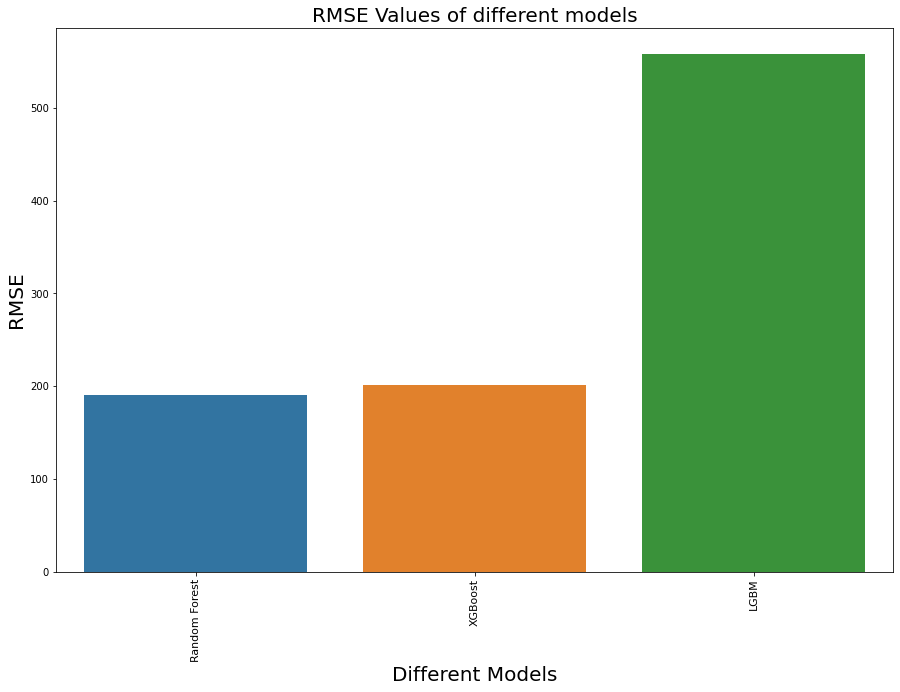

In [178]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Different Models",fontsize = 20)
plt.ylabel('RMSE',fontsize = 20)
plt.title("RMSE Values of different models" , fontsize = 20)
sb.barplot(x=models,y=rmse);

# Section 3- Analysis of Death and Recovery rate.

## Let's have a look over the Average Growth rate of covid cases in India
 
 -Before first lockdown (upto 24 March 2020)
 
 -During first lockdown (from 25th March 2020 to 14th April 2020)
 
 -During second lockdown (from 15th April 2020 to 3rd May 2020)
 
 -In third lockdown (from 4th May 2020 onwards)
 
 

In [179]:
before_lockdown_growth = []
first_lockdown_growth = []
second_lockdown_growth = []
third_lockdown_growth = []

# As there the continuous reporting of cases have started from 2/3/2020 so truncating the dataframe accordingly.

Before_lockdown=df['2020-03-02':'2020-03-25']
Before_lockdown=Before_lockdown.reset_index()

# Calculating average growth rate before lockdown period

for i in range(1,len(Before_lockdown)):
    before_lockdown_growth.append(Before_lockdown.loc[i,'Daily Confirmed'] / Before_lockdown.loc[i-1,'Daily Confirmed'])


first_lockdown=df['2020-03-25':'2020-04-15']
first_lockdown=first_lockdown.reset_index()

# Calculating average growth rate in first lockdown

for i in range(1,len(first_lockdown)):
    first_lockdown_growth.append(first_lockdown.loc[i,'Daily Confirmed'] / first_lockdown.loc[i-1,'Daily Confirmed'])
    

second_lockdown=df['2020-04-15':'2020-05-04']
second_lockdown=second_lockdown.reset_index()

# Calculating average growth rate in second lockdown

for i in range(1,len(second_lockdown)):
    second_lockdown_growth.append(second_lockdown.loc[i,'Daily Confirmed'] / second_lockdown.loc[i-1,'Daily Confirmed'])


third_lockdown=df['2020-05-04':]
third_lockdown=third_lockdown.reset_index()

# Calculating average growth rate in third lockdown

for i in range(1,len(third_lockdown)):
    third_lockdown_growth.append(third_lockdown.loc[i,'Daily Confirmed'] / third_lockdown.loc[i-1,'Daily Confirmed'])



before_lockdown_growth_factor = sum(before_lockdown_growth)/len(before_lockdown_growth)
first_lockdown_growth_factor = sum(first_lockdown_growth)/len(first_lockdown_growth)
second_lockdown_growth_factor = sum(second_lockdown_growth)/len(second_lockdown_growth)
third_lockdown_growth_factor = sum(third_lockdown_growth)/len(third_lockdown_growth)

print('Average growth factor before lockdown implemented ',before_lockdown_growth_factor)
print('Average growth factor in first lockdown ',first_lockdown_growth_factor)
print('Average growth factor in second lockdown ',second_lockdown_growth_factor)
print('Average growth factor in third lockdown ',third_lockdown_growth_factor)

Average growth factor before lockdown implemented  2.124545402587113
Average growth factor in first lockdown  1.1597510815308565
Average growth factor in second lockdown  1.0956259303600797
Average growth factor in third lockdown  1.0106458636471445


# Prediction using average growth factor over the entire period 
### Assuming the same growth factor continues for the next 15 days

In [180]:
growth_diff = []

df1=df['2020-03-02':]
df1=df1.reset_index()

for i in range(1,len(df1)):
    growth_diff.append(df1.loc[i,'Daily Confirmed'] / df1.loc[i-1,'Daily Confirmed'])

growth_factor = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_factor)

Average growth factor 1.4383292472911304


In [181]:
date1 = '2020-01-30'
date2 = '2020-05-27'
prediction_dates = pd.date_range(date1, date2).tolist()

In [182]:
columns=['date','Patients','Total Confirmed']
confirmed = pd.DataFrame(columns=columns)
confirmed['date']=prediction_dates

In [183]:
confirmed.index=confirmed['date']
confirmed.drop(['date'],axis=1,inplace=True)

In [184]:
confirmed['Patients']=df['Daily Confirmed']
confirmed['Total Confirmed']=df['Total Confirmed']

In [185]:
previous_day_cases=df.loc['2020-05-12','Daily Confirmed']
predicted_cases = []

for i in range(15):
    predicted_value = previous_day_cases *  growth_factor
    predicted_cases.append(predicted_value)
    previous_day_cases = predicted_value

In [186]:
confirmed=confirmed.reset_index()

In [187]:
confirmed.loc[104:,'Patients']=predicted_cases

In [188]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 3 columns):
date               119 non-null datetime64[ns]
Patients           119 non-null float64
Total Confirmed    104 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.9 KB


In [189]:
for i in range(15):
    confirmed.loc[104+i,'Total Confirmed']=confirmed.loc[104+i-1,'Total Confirmed']+confirmed.loc[104+i,'Patients']

In [190]:
confirmed.index=confirmed['date']
confirmed.drop(['date'],axis=1,inplace=True)

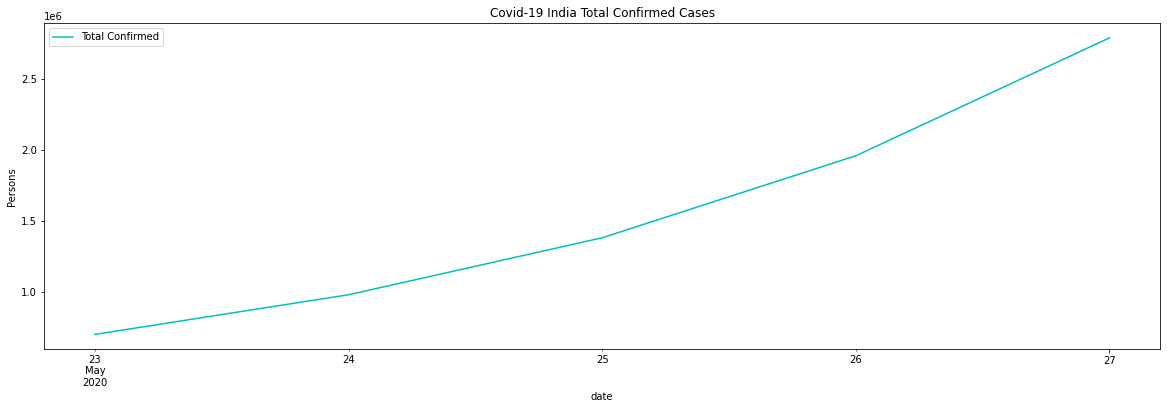

In [191]:
title='Covid-19 India Total Confirmed Cases'
ylabel='Persons'

ax = confirmed['Total Confirmed'].iloc[-5:].plot(legend=True,figsize=(20,6),title=title,linestyle='-',color='c')
ax.autoscale(axis='x');
ax.set(ylabel=ylabel);

In [192]:
confirmed=confirmed.round()
confirmed.tail()

,Patients,Total Confirmed
date,,
2020-05-23,194095.0,699544.0
2020-05-24,279172.0,978716.0
2020-05-25,401541.0,1380257.0
2020-05-26,577548.0,1957805.0
2020-05-27,830705.0,2788510.0


We could see that the graph is increasing exponentialy if the average growth factor doesn't decrease. It is important that the growth factor is reduced to flatten the curve.

## Let's have a look at the rate of average test per confirmed cases.

In [193]:
tests.tail()

,Date,Tests,dayofweek,Total Tests
56,2020-05-13,85034.0,2,1879834.0
57,2020-05-14,79354.0,3,1959188.0
58,2020-05-15,78044.0,4,2037232.0
59,2020-05-16,82617.0,5,2119849.0
60,2020-05-17,82001.0,6,2201850.0


In [194]:
df_clean.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2,Tests,dayofweek
51,2020-05-08,3339,59690,1111,17887,97,1986,3242.669015,3242.669015,3591.293179,3640.722657,-5.0,253.0,80375.0,4
52,2020-05-09,3175,62865,1414,19301,115,2101,3220.112676,3220.112676,3497.868962,3601.157133,-164.0,-159.0,85425.0,5
53,2020-05-10,4311,67176,1669,20970,112,2213,3583.741784,3583.741784,4010.437625,3497.950773,1136.0,1300.0,85824.0,6
54,2020-05-11,3592,70768,1579,22549,81,2294,3586.494523,3586.494523,3931.767589,4016.142099,-719.0,-1855.0,64651.0,0
55,2020-05-12,3561,74329,1904,24453,120,2414,3577.996349,NaN,NaN,3871.856637,-31.0,688.0,85891.0,1


In [195]:
df_clean['Total Tests']=tests.loc[:56,'Total Tests']

In [196]:
df_clean['test_per_confirmed_cases']=df_clean['Total Tests']/df_clean['Total Confirmed']

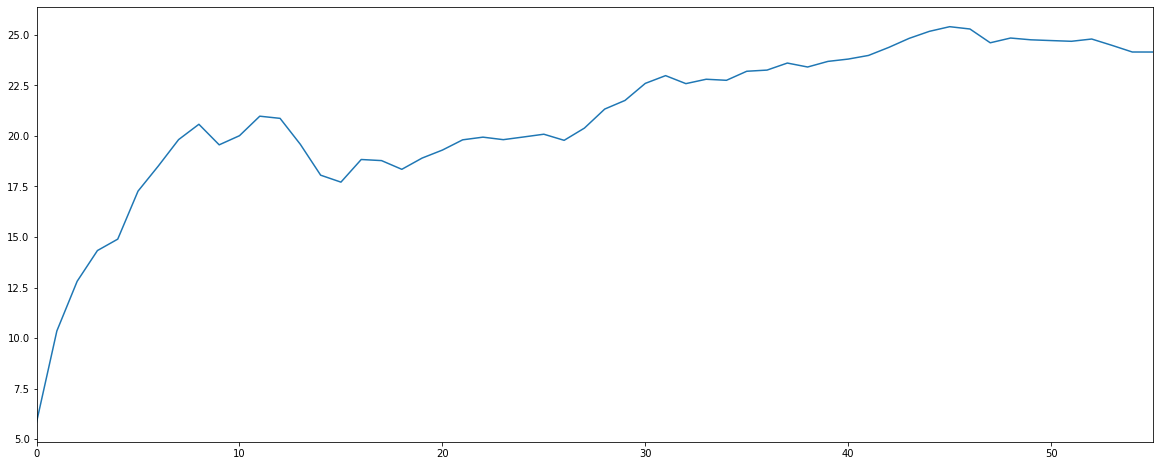

In [197]:
df_clean['test_per_confirmed_cases'].plot(figsize=(20,8));

### The no of tests per confirmed cases of the entire country has increased significantly there are two factors which may have resulted in it

### 1. The spread of the virus has decreased overtime possibly due to lockdown.

### 2. The no of smaples tested in a day have significantly increased overtime which actually is clearly visible by the data provided. 

## Let's have a look at the average recovery rate.

In [198]:
df.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2
Date,,,,,,,,,,,,
2020-01-30,1,1,0,0,0,0,1.000000,1.000000,1.003116,10.824065,NaN,NaN
2020-01-31,0,1,0,0,0,0,0.666667,0.666667,0.505421,3.619013,-1.0,NaN
2020-02-01,0,1,0,0,0,0,0.444444,0.444444,0.219730,3.188630,0.0,1.0
2020-02-02,1,2,0,0,0,0,0.629630,0.629630,0.564969,-59.100119,1.0,1.0
2020-02-03,1,3,0,0,0,0,0.753086,0.753086,0.766516,48.096003,0.0,-1.0


In [199]:
recovery_diff = []

df1=df['2020-03-23':]
df1=df1.reset_index()

for i in range(1,len(df1)):
    recovery_diff.append(df1.loc[i,'Daily Recovered'] / df1.loc[i-1,'Daily Recovered'])

recovery_factor = sum(recovery_diff)/len(recovery_diff)
print('Average recovery factor',recovery_factor)

Average recovery factor 1.3497052505870137


In [200]:
confirmed['Daily Recovered']=df['Daily Recovered']

In [201]:
confirmed['Total Recovered']=df['Total Recovered']
confirmed['Daily Deceased']=df['Daily Deceased']
confirmed['Total Deceased']=df['Total Deceased']

In [202]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2020-01-30 to 2020-05-27
Data columns (total 6 columns):
Patients           119 non-null float64
Total Confirmed    119 non-null float64
Daily Recovered    104 non-null float64
Total Recovered    104 non-null float64
Daily Deceased     104 non-null float64
Total Deceased     104 non-null float64
dtypes: float64(6)
memory usage: 6.5 KB


In [203]:
previous_day_recovery=df.loc['2020-05-12','Daily Recovered']
predicted_recovery = []

for i in range(15):
    predicted_value = previous_day_recovery *  recovery_factor
    predicted_recovery.append(predicted_value)
    previous_day_cases = predicted_value
    
confirmed=confirmed.reset_index()
confirmed.loc[104:,'Daily Recovered']=predicted_recovery

In [204]:
for i in range(15):
    confirmed.loc[104+i,'Total Recovered']=confirmed.loc[104+i-1,'Total Recovered']+confirmed.loc[104+i,'Daily Recovered']

In [205]:
confirmed.tail()

,date,Patients,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
114,2020-05-23,194095.0,699544.0,2569.838797,52721.226768,NaN,NaN
115,2020-05-24,279172.0,978716.0,2569.838797,55291.065565,NaN,NaN
116,2020-05-25,401541.0,1380257.0,2569.838797,57860.904363,NaN,NaN
117,2020-05-26,577548.0,1957805.0,2569.838797,60430.743160,NaN,NaN
118,2020-05-27,830705.0,2788510.0,2569.838797,63000.581957,NaN,NaN


## 63000 people would have recovered by 27/05/2020 provided same recovery rate continues. Number may increase if recovery rate increases.

# ETS Decomposition for recovered cases

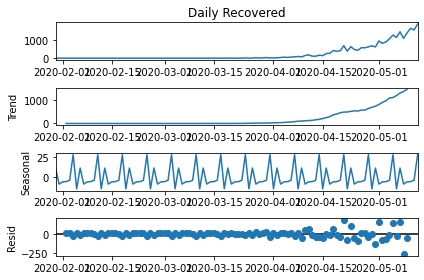

In [206]:
results = seasonal_decompose(df['Daily Recovered'])
results.plot();

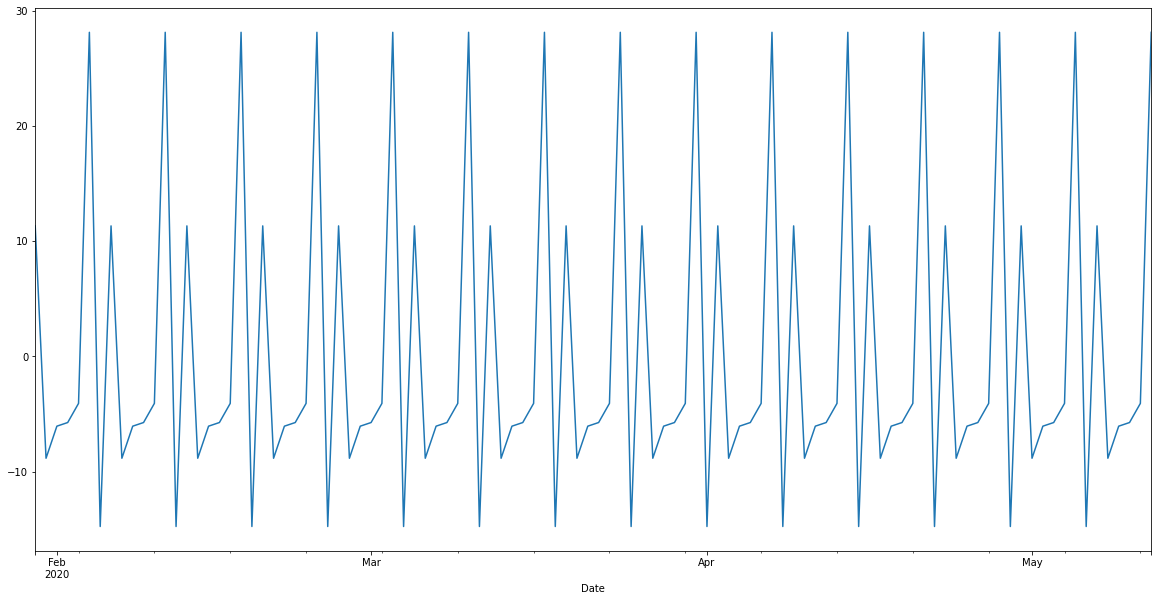

In [207]:
results.seasonal.plot(figsize=(20,10));

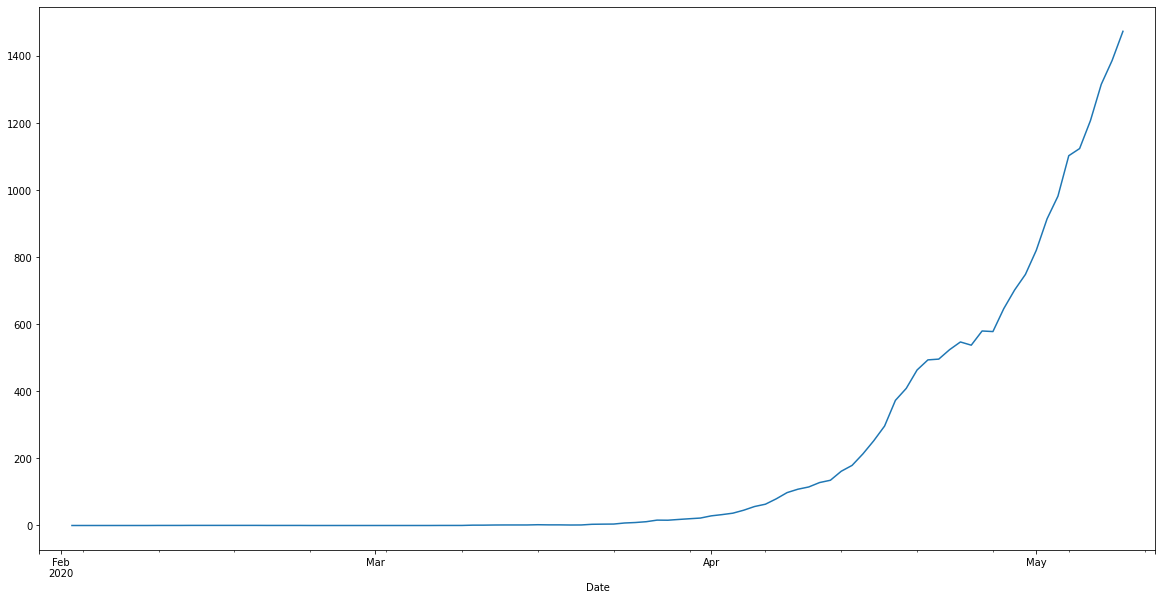

In [208]:
# Trend of Daily recovered cases
results.trend.plot(figsize=(20,10));

In [209]:
# As the recovery of cases started from 23/03/2020
df1=df['2020-03-23':]
len(df1)

51

In [210]:
train=df1.iloc[:46]
test=df1.iloc[46:]

In [211]:
# Simple Exponential Smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 5
alpha = 2/(span+1)

df1['EWMA5'] = df1['Daily Recovered'].ewm(alpha=alpha,adjust=False).mean()
df1['SES5']=SimpleExpSmoothing(df1['Daily Recovered']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df1.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2
Date,,,,,,,,,,,,
2020-03-23,94,497,2,25,2,9,2.000000,2.000000,86.566591,10.476678,25.0,34.0
2020-03-24,74,571,15,40,1,10,6.333333,6.333333,85.389717,133.603592,-20.0,-45.0
2020-03-25,86,657,3,43,1,11,5.222222,5.222222,90.384317,95.120146,12.0,32.0
2020-03-26,73,730,7,50,5,16,5.814815,5.814815,86.290384,92.505165,-13.0,-25.0
2020-03-27,153,883,25,75,3,19,12.209877,12.209877,124.089705,88.194785,80.0,93.0


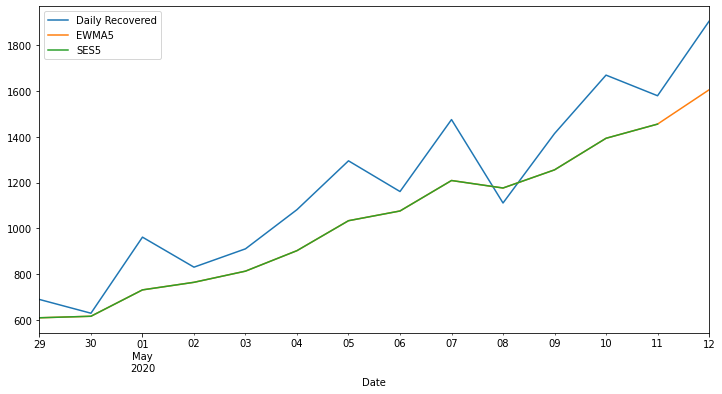

In [212]:
df1[['Daily Recovered','EWMA5','SES5']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Double Exponential Smoothing

In [213]:
# Double Exponential Smoothing

df1['DESadd5_recovery'] = ExponentialSmoothing(df1['Daily Recovered'], trend='add').fit().fittedvalues.shift(-1)
df1.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2,DESadd5_recovery
Date,,,,,,,,,,,,,
2020-03-23,94,497,2,25,2,9,2.000000,2.000000,86.566591,10.476678,25.0,34.0,3.906836
2020-03-24,74,571,15,40,1,10,6.333333,6.333333,85.389717,133.603592,-20.0,-45.0,10.446988
2020-03-25,86,657,3,43,1,11,5.222222,5.222222,90.384317,95.120146,12.0,32.0,10.024114
2020-03-26,73,730,7,50,5,16,5.814815,5.814815,86.290384,92.505165,-13.0,-25.0,10.865712
2020-03-27,153,883,25,75,3,19,12.209877,12.209877,124.089705,88.194785,80.0,93.0,18.749720


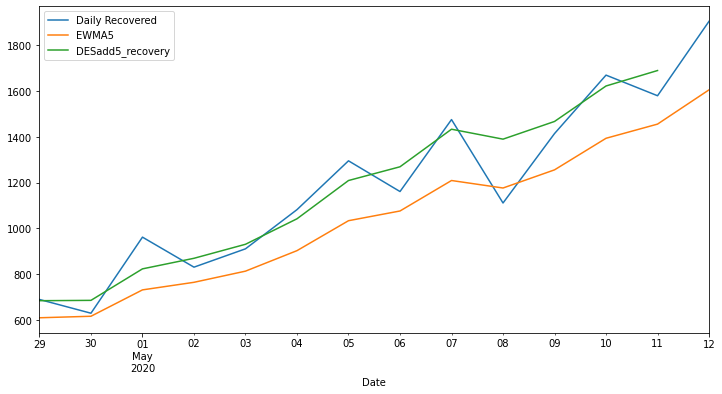

In [214]:
df1[['Daily Recovered','EWMA5','DESadd5_recovery']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data than Simple Exponential Smoothing.
Let's see if using a multiplicative trend adjustment helps.

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


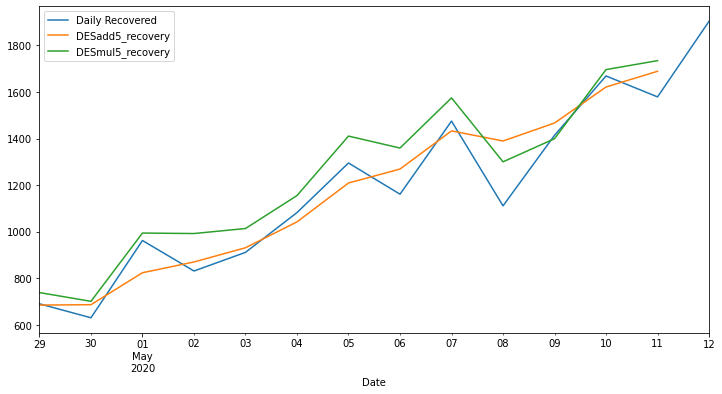

In [215]:
df1['DESmul5_recovery'] = ExponentialSmoothing(df1['Daily Recovered'], trend='mul').fit().fittedvalues.shift(-1)
df1[['Daily Recovered','DESadd5_recovery','DESmul5_recovery']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Triple Exponential Smoothing

Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.

In [216]:
df1['TESadd5'] = ExponentialSmoothing(df1['Daily Recovered'],trend='add',seasonal='add',seasonal_periods=5).fit().fittedvalues
df1.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2,DESadd5_recovery,DESmul5_recovery
Date,,,,,,,,,,,,,,
2020-03-23,94,497,2,25,2,9,2.000000,2.000000,86.566591,14.617463,25.0,34.0,3.906836,39.769937
2020-03-24,74,571,15,40,1,10,6.333333,6.333333,85.389717,-12.454591,-20.0,-45.0,10.446988,107.069330
2020-03-25,86,657,3,43,1,11,5.222222,5.222222,90.384317,4.440686,12.0,32.0,10.024114,132.905608
2020-03-26,73,730,7,50,5,16,5.814815,5.814815,86.290384,13.266721,-13.0,-25.0,10.865712,116.266503
2020-03-27,153,883,25,75,3,19,12.209877,12.209877,124.089705,48.550246,80.0,93.0,18.749720,90.551287


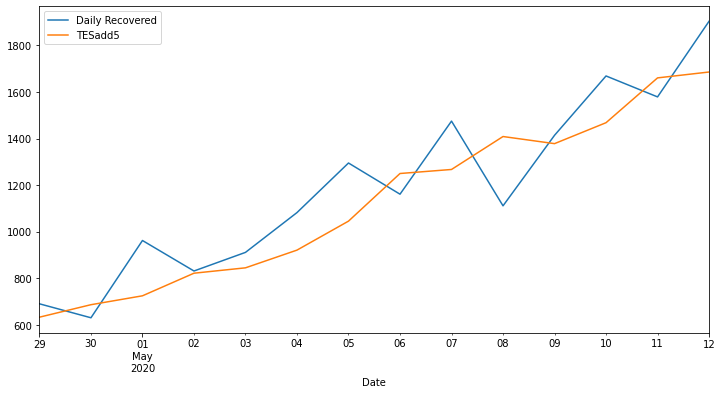

In [217]:
df1[['Daily Recovered','TESadd5']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

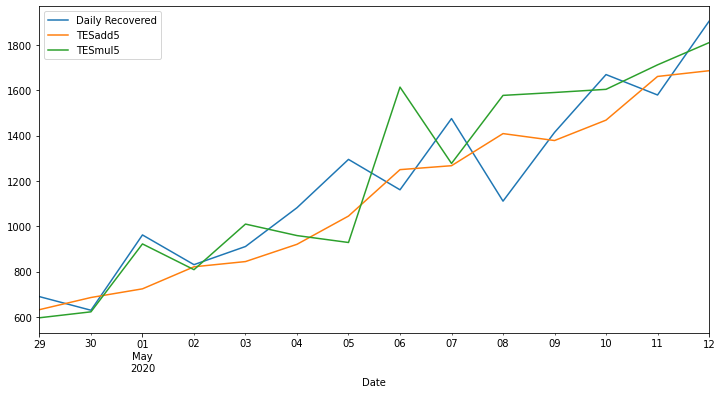

In [218]:
df1['TESmul5'] = ExponentialSmoothing(df1['Daily Recovered'],trend='mul',seasonal='mul',seasonal_periods=5).fit().fittedvalues
df1[['Daily Recovered','TESadd5','TESmul5']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Testing for stationarity of recovery data.

In [219]:
adf_test(df1['Daily Recovered'])

Augmented Dickey-Fuller Test: 
ADF test statistic       4.114833
p-value                  1.000000
# lags used              2.000000
# observations          48.000000
critical value (1%)     -3.574589
critical value (5%)     -2.923954
critical value (10%)    -2.600039
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [220]:
df1['d1_recovery'] = diff(df1['Daily Recovered'],k_diff=1)

adf_test(df1['d1_recovery'],'')

Augmented Dickey-Fuller Test: 
ADF test statistic      -2.964700
p-value                  0.038325
# lags used              2.000000
# observations          47.000000
critical value (1%)     -3.577848
critical value (5%)     -2.925338
critical value (10%)    -2.600774
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [221]:
# Auto Arima Model

stepwise_model = auto_arima(train['Daily Recovered'], start_p=0, start_q=0, max_p=5, max_q=5,m=7,seasonality=True,
d=1,D=1,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

print(stepwise_model.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=486.965, BIC=493.515, Fit time=0.177 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=500.669, BIC=503.944, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=471.545, BIC=478.095, Fit time=0.165 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=472.059, BIC=478.610, Fit time=0.181 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=484.288, BIC=489.201, Fit time=0.049 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 7); AIC=469.582, BIC=477.770, Fit time=0.315 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 7); AIC=470.869, BIC=480.694, Fit time=0.358 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 7); AIC=487.578, BIC=494.129, Fit time=0.283 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 0, 7); AIC=466.808, BIC=476.634, Fit time=0.380 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 0, 7);

In [222]:
model = SARIMAX(train['Daily Recovered'],order=(3,1,0),seasonal_order=(2,1,0,7),enforce_invertibility=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                   Daily Recovered   No. Observations:                   46
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 7)   Log Likelihood                -228.833
Date:                           Wed, 13 May 2020   AIC                            469.666
Time:                                   07:27:51   BIC                            479.492
Sample:                               03-23-2020   HQIC                           473.162
                                    - 05-07-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6094      0.162     -3.761      0.000      -0.927      -0.292
ar.L2          0.1801      0.238      0.758      0.448      -0.286       0.646
ar.L3          0.4271      0.129      3.323      0.001       0.175       0.679
ar.S.L7       -0.7723      0.198     -3.901      0.000      -1.160      -0.384
ar.S.L14      -0.2688      0.251     -1.072      0.283      -0.760       0.222
sigma2      8714.1406   1943.842      4.483      0.000    4904.281    1.25e+04
===================================================================================
Ljung-Box (Q):                       13.49   Jarque-Bera (JB):                 2.31
Prob(Q):                              1.00   Prob(JB):                         0.32
Heteroskedasticity (H):              18.12   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [223]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False,typ='levels').rename('SARIMA(3,1,0)(2,1,0,7) Predictions')

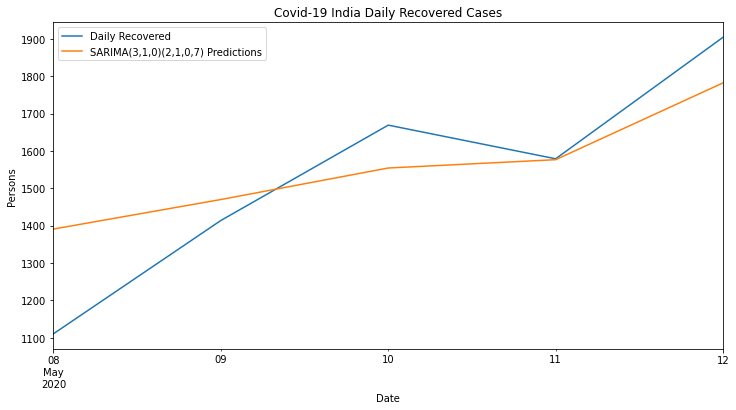

In [224]:
title='Covid-19 India Daily Recovered Cases'
ylabel='Persons'

ax = test['Daily Recovered'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [225]:
predictions

2020-05-08    1391.104008
2020-05-09    1470.046838
2020-05-10    1554.343366
2020-05-11    1576.606674
2020-05-12    1782.055250
Freq: D, Name: SARIMA(3,1,0)(2,1,0,7) Predictions, dtype: float64

In [226]:
np.sqrt(mean_squared_error(test['Daily Recovered'], predictions))

148.06883322215614

Predicting for one week ahead.

In [227]:
model = SARIMAX(df1['Daily Recovered'],order=(3,1,0),seasonal_order=(2,1,0,7),enforce_invertibility=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                   Daily Recovered   No. Observations:                   51
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 7)   Log Likelihood                -265.507
Date:                           Wed, 13 May 2020   AIC                            543.014
Time:                                   07:27:52   BIC                            553.581
Sample:                               03-23-2020   HQIC                           546.911
                                    - 05-12-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5943      0.161     -3.681      0.000      -0.911      -0.278
ar.L2          0.0419      0.218      0.192      0.848      -0.386       0.470
ar.L3          0.3605      0.166      2.173      0.030       0.035       0.686
ar.S.L7       -0.9152      0.203     -4.503      0.000      -1.314      -0.517
ar.S.L14      -0.2686      0.299     -0.899      0.368      -0.854       0.317
sigma2       1.15e+04   2841.444      4.046      0.000    5926.753    1.71e+04
===================================================================================
Ljung-Box (Q):                       21.35   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.99   Prob(JB):                         0.45
Heteroskedasticity (H):              16.92   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [228]:
start=len(df1)
end=len(df1)+5
predictions = results.predict(start=start, end=end, dynamic=False,typ='levels').rename('SARIMA(3,1,0)(2,1,0,7) Predictions')

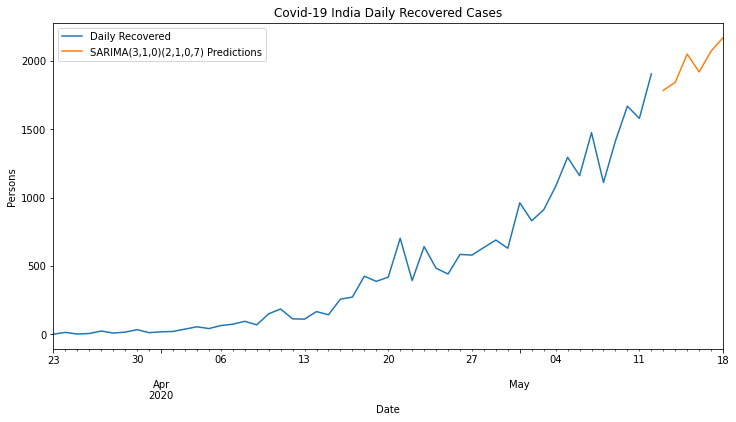

In [229]:
title='Covid-19 India Daily Recovered Cases'
ylabel='Persons'

ax = df1['Daily Recovered'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [230]:
predictions

2020-05-13    1784.234766
2020-05-14    1843.164154
2020-05-15    2049.414035
2020-05-16    1919.001579
2020-05-17    2070.840207
2020-05-18    2169.496163
Freq: D, Name: SARIMA(3,1,0)(2,1,0,7) Predictions, dtype: float64

In [231]:
date1 = '2020-01-30'
date2 = '2020-05-17'
mydates = pd.date_range(date1, date2).tolist()
len(mydates)

109

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2020-01-30 to 2020-05-12
Freq: D
Data columns (total 12 columns):
Daily Confirmed    104 non-null int64
Total Confirmed    104 non-null int64
Daily Recovered    104 non-null int64
Total Recovered    104 non-null int64
Daily Deceased     104 non-null int64
Total Deceased     104 non-null int64
EWMA5              104 non-null float64
SES5               103 non-null float64
DESadd5            103 non-null float64
TESadd5            104 non-null float64
d1                 103 non-null float64
d2                 102 non-null float64
dtypes: float64(6), int64(6)
memory usage: 15.6 KB


In [233]:
a=pd.DataFrame()
a['Date']=mydates
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 1 columns):
Date    109 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1000.0 bytes


In [234]:
a.index=a['Date']
a.drop(['Date'],axis=1,inplace=True)
a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2020-01-30 to 2020-05-17
Empty DataFrame

In [235]:
a['Recovered']=df['Daily Recovered']
a['Total Recovered']=df['Total Recovered']
a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2020-01-30 to 2020-05-17
Data columns (total 2 columns):
Recovered          104 non-null float64
Total Recovered    104 non-null float64
dtypes: float64(2)
memory usage: 2.6 KB


In [236]:
a=a.round()

In [237]:
a=a.reset_index()

In [238]:
for i in range(6):
    a.loc[104+i:,'Recovered']=predictions[i]

In [239]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
Date               109 non-null datetime64[ns]
Recovered          109 non-null float64
Total Recovered    104 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.7 KB


In [240]:
for i in range(5):
    a.loc[104+i,'Total Recovered']=a.loc[104+i-1,'Total Recovered']+a.loc[104+i,'Recovered']
a.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
Date               109 non-null datetime64[ns]
Recovered          109 non-null float64
Total Recovered    109 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.7 KB


In [241]:
a=a.round()
a.tail()

,Date,Recovered,Total Recovered
104,2020-05-13,1784.0,26237.0
105,2020-05-14,1843.0,28080.0
106,2020-05-15,2049.0,30130.0
107,2020-05-16,1919.0,32049.0
108,2020-05-17,2071.0,34120.0


## From ARIMA model total recovered cases would be 34120 approximately by 17/05/2020.

## Let's have a look at the Death rate.

In [242]:
df.tail()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2
Date,,,,,,,,,,,,
2020-05-08,3339,59690,1111,17887,97,1986,1176.395201,1176.395201,3591.293179,3640.722657,-5.0,253.0
2020-05-09,3175,62865,1414,19301,115,2101,1255.596800,1255.596800,3497.868962,3601.157133,-164.0,-159.0
2020-05-10,4311,67176,1669,20970,112,2213,1393.397867,1393.397867,4010.437625,3497.950773,1136.0,1300.0
2020-05-11,3592,70768,1579,22549,81,2294,1455.265245,1455.265245,3931.767589,4016.142099,-719.0,-1855.0
2020-05-12,3561,74329,1904,24453,120,2414,1604.843496,NaN,NaN,3871.856637,-31.0,688.0


In [243]:
death_diff = []

df1=df['2020-03-22':]
df1=df1.reset_index()

for i in range(1,len(df1)):
    death_diff.append(df1.loc[i,'Daily Deceased'] / df1.loc[i-1,'Daily Deceased'])

death_factor = sum(death_diff)/len(death_diff)
print('Average death factor',death_factor)

Average death factor 1.2397739465235207


In [244]:
len(df)

104

In [245]:
previous_day_death=df.loc['2020-05-12','Daily Deceased']
predicted_death = []

for i in range(15):
    predicted_value = previous_day_death *  death_factor
    predicted_death.append(predicted_value)
    previous_day_death = predicted_value
    

confirmed.loc[104:,'Daily Deceased']=predicted_death

In [246]:
confirmed.tail()

,date,Patients,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
114,2020-05-23,194095.0,699544.0,2569.838797,52721.226768,1276.288356,NaN
115,2020-05-24,279172.0,978716.0,2569.838797,55291.065565,1582.309052,NaN
116,2020-05-25,401541.0,1380257.0,2569.838797,57860.904363,1961.705538,NaN
117,2020-05-26,577548.0,1957805.0,2569.838797,60430.743160,2432.071417,NaN
118,2020-05-27,830705.0,2788510.0,2569.838797,63000.581957,3015.218779,NaN


In [247]:
for i in range(15):
    confirmed.loc[104+i,'Total Deceased']=confirmed.loc[104+i-1,'Total Deceased']+confirmed.loc[104+i,'Daily Deceased']

In [248]:
confirmed.index=confirmed['date']
confirmed.drop(['date'],axis=1,inplace=True)

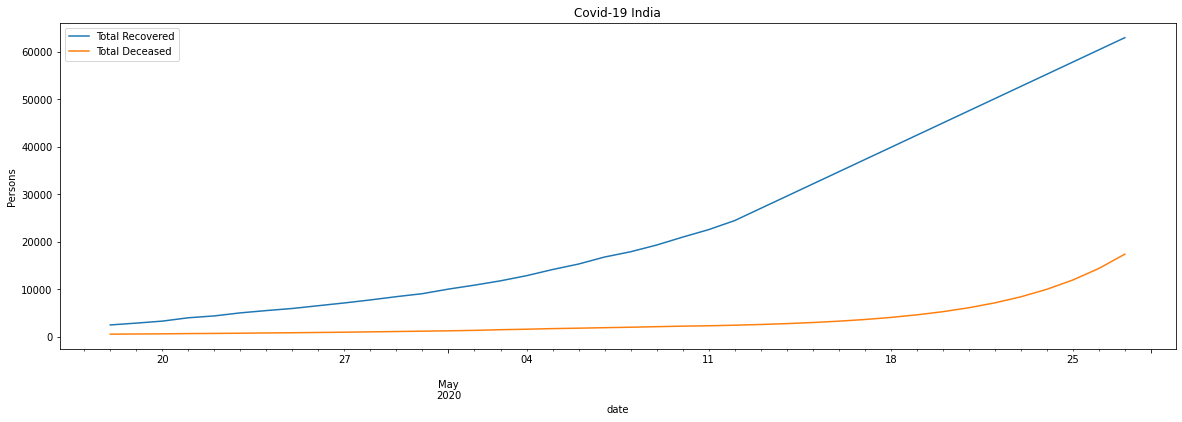

In [249]:
title='Covid-19 India'
ylabel='Persons'

ax = confirmed[['Total Recovered','Total Deceased']].iloc[-40:].plot(legend=True,figsize=(20,6),title=title,linestyle='-')
ax.autoscale(axis='x');
ax.set(ylabel=ylabel);

In [250]:
confirmed=confirmed.round()
confirmed.tail()

,Patients,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
date,,,,,,
2020-05-23,194095.0,699544.0,2570.0,52721.0,1276.0,8393.0
2020-05-24,279172.0,978716.0,2570.0,55291.0,1582.0,9975.0
2020-05-25,401541.0,1380257.0,2570.0,57861.0,1962.0,11937.0
2020-05-26,577548.0,1957805.0,2570.0,60431.0,2432.0,14369.0
2020-05-27,830705.0,2788510.0,2570.0,63001.0,3015.0,17384.0


## If similar rate of death and recovery continues then by 27/05/2020

### Total death toll in India will reach 17000 mark

### Recovered patients would be 63001.

# ETS Decomposition for death rate.

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2020-01-30 to 2020-05-12
Freq: D
Data columns (total 12 columns):
Daily Confirmed    104 non-null int64
Total Confirmed    104 non-null int64
Daily Recovered    104 non-null int64
Total Recovered    104 non-null int64
Daily Deceased     104 non-null int64
Total Deceased     104 non-null int64
EWMA5              104 non-null float64
SES5               103 non-null float64
DESadd5            103 non-null float64
TESadd5            104 non-null float64
d1                 103 non-null float64
d2                 102 non-null float64
dtypes: float64(6), int64(6)
memory usage: 15.6 KB


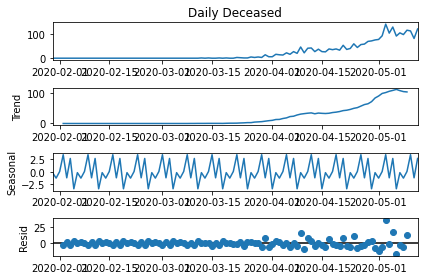

In [252]:
results = seasonal_decompose(df['Daily Deceased'])
results.plot();

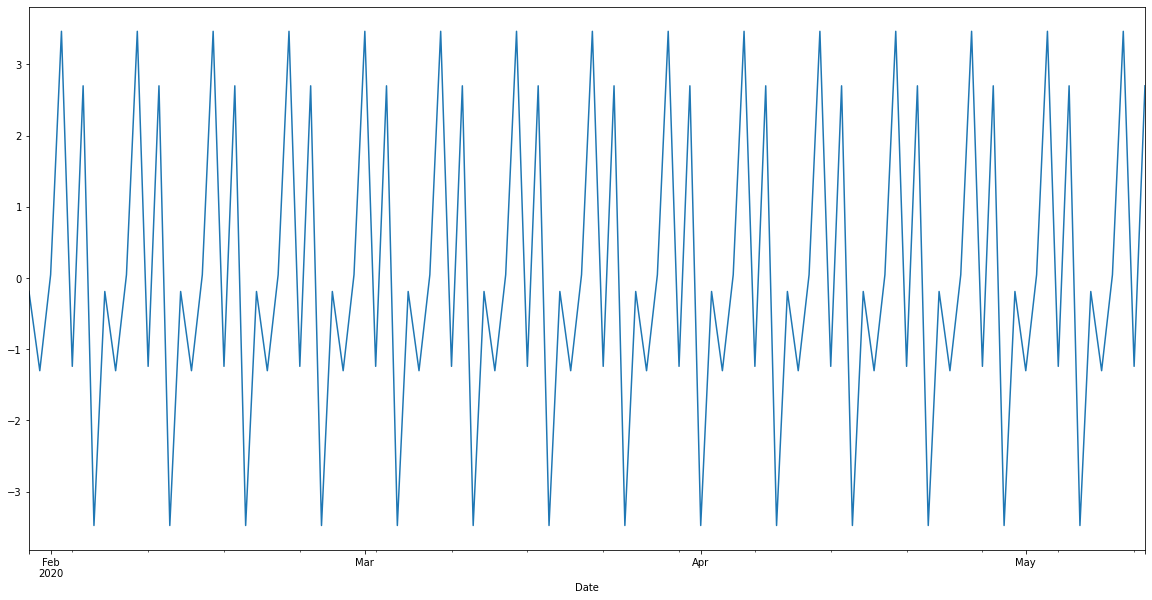

In [253]:
results.seasonal.plot(figsize=(20,10));

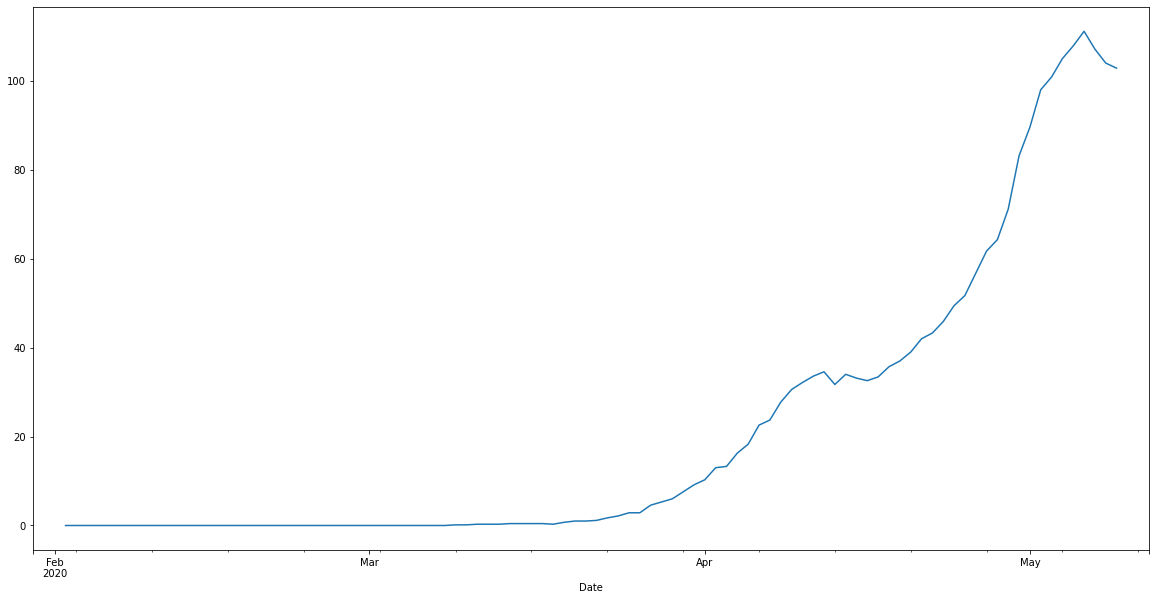

In [254]:
results.trend.plot(figsize=(20,10));

In [255]:
# As the deceased cases started from 22/03/2020
df1=df['2020-03-22':]
len(df1)

52

In [256]:
train=df1.iloc[:47]
test=df1.iloc[47:]

Simple Exponential Smoothing

In [257]:
span = 7
alpha = 2/(span+1)

df1['EWMA7_deceased'] = df1['Daily Deceased'].ewm(alpha=alpha,adjust=False).mean()
df1['SES7_deceased']=SimpleExpSmoothing(df1['Daily Deceased']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df1.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2,EWMA7_deceased,SES7_deceased
Date,,,,,,,,,,,,,,
2020-03-22,69,403,0,23,3,7,55.108235,55.108235,70.343506,65.842493,-9.0,-29.0,3.000000,3.000000
2020-03-23,94,497,2,25,2,9,2.000000,2.000000,86.566591,10.476678,25.0,34.0,2.750000,2.750000
2020-03-24,74,571,15,40,1,10,6.333333,6.333333,85.389717,133.603592,-20.0,-45.0,2.312500,2.312500
2020-03-25,86,657,3,43,1,11,5.222222,5.222222,90.384317,95.120146,12.0,32.0,1.984375,1.984375
2020-03-26,73,730,7,50,5,16,5.814815,5.814815,86.290384,92.505165,-13.0,-25.0,2.738281,2.738281


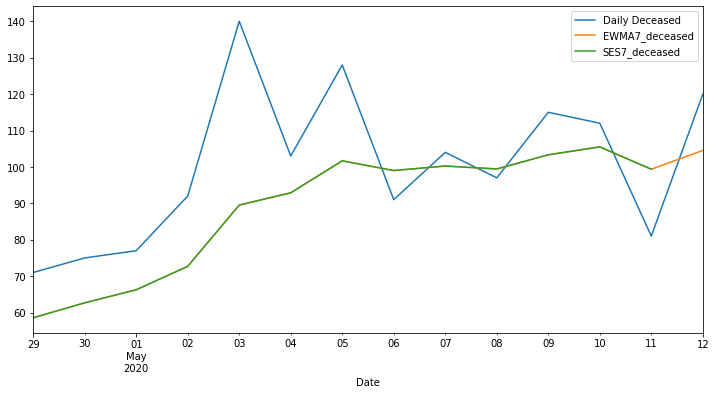

In [258]:
df1[['Daily Deceased','EWMA7_deceased','SES7_deceased']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Double Exponential Smoothing

In [259]:
# Double Exponential Smoothing

df1['DESadd7_deceased'] = ExponentialSmoothing(df1['Daily Deceased'], trend='add').fit().fittedvalues.shift(-1)
df1.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2,EWMA7_deceased,SES7_deceased,DESadd7_deceased
Date,,,,,,,,,,,,,,,
2020-03-22,69,403,0,23,3,7,55.108235,55.108235,70.343506,65.842493,-9.0,-29.0,3.000000,3.000000,4.599360
2020-03-23,94,497,2,25,2,9,2.000000,2.000000,86.566591,10.476678,25.0,34.0,2.750000,2.750000,5.752483
2020-03-24,74,571,15,40,1,10,6.333333,6.333333,85.389717,133.603592,-20.0,-45.0,2.312500,2.312500,6.091181
2020-03-25,86,657,3,43,1,11,5.222222,5.222222,90.384317,95.120146,12.0,32.0,1.984375,1.984375,6.301766
2020-03-26,73,730,7,50,5,16,5.814815,5.814815,86.290384,92.505165,-13.0,-25.0,2.738281,2.738281,7.945708


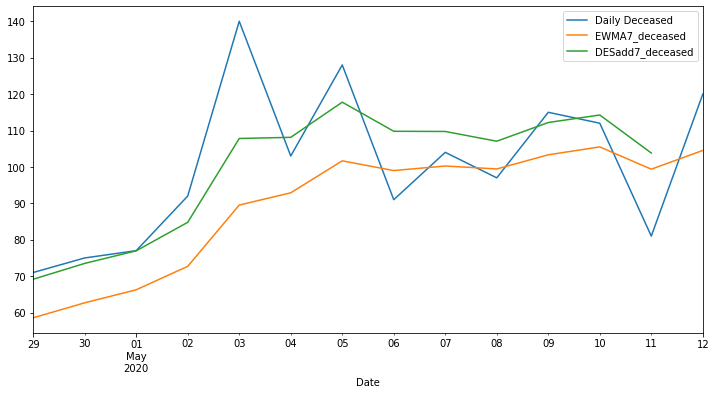

In [260]:
df1[['Daily Deceased','EWMA7_deceased','DESadd7_deceased']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data than Simple Exponential Smoothing. Let's see if using a multiplicative trend adjustment helps.

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


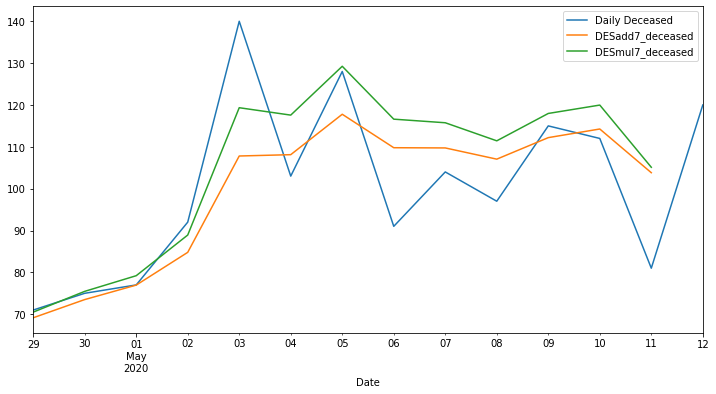

In [261]:
df1['DESmul7_deceased'] = ExponentialSmoothing(df1['Daily Deceased'], trend='mul').fit().fittedvalues.shift(-1)
df1[['Daily Deceased','DESadd7_deceased','DESmul7_deceased']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Triple Exponential Smoothing

Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.

In [262]:
df1['TESadd7_deceased'] = ExponentialSmoothing(df1['Daily Deceased'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
df1.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,EWMA5,SES5,DESadd5,TESadd5,d1,d2,EWMA7_deceased,SES7_deceased,DESadd7_deceased,DESmul7_deceased,TESadd7_deceased
Date,,,,,,,,,,,,,,,,,
2020-03-22,69,403,0,23,3,7,55.108235,55.108235,70.343506,65.842493,-9.0,-29.0,3.000000,3.000000,4.599360,1.677122,4.885939
2020-03-23,94,497,2,25,2,9,2.000000,2.000000,86.566591,10.476678,25.0,34.0,2.750000,2.750000,5.752483,1.229140,-6.223375
2020-03-24,74,571,15,40,1,10,6.333333,6.333333,85.389717,133.603592,-20.0,-45.0,2.312500,2.312500,6.091181,0.750322,10.889771
2020-03-25,86,657,3,43,1,11,5.222222,5.222222,90.384317,95.120146,12.0,32.0,1.984375,1.984375,6.301766,0.585049,-4.382285
2020-03-26,73,730,7,50,5,16,5.814815,5.814815,86.290384,92.505165,-13.0,-25.0,2.738281,2.738281,7.945708,2.090950,6.632564


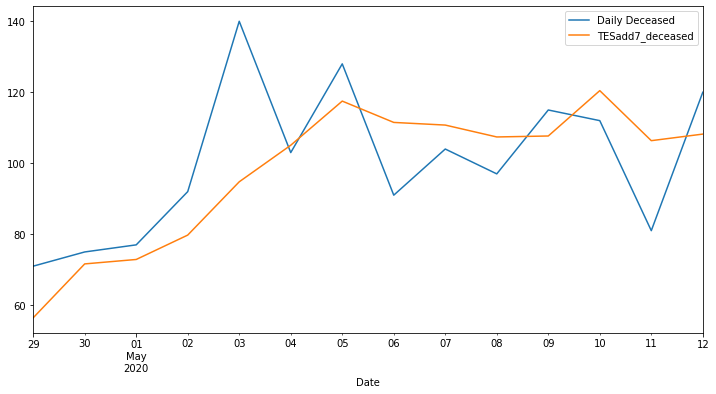

In [263]:
df1[['Daily Deceased','TESadd7_deceased']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

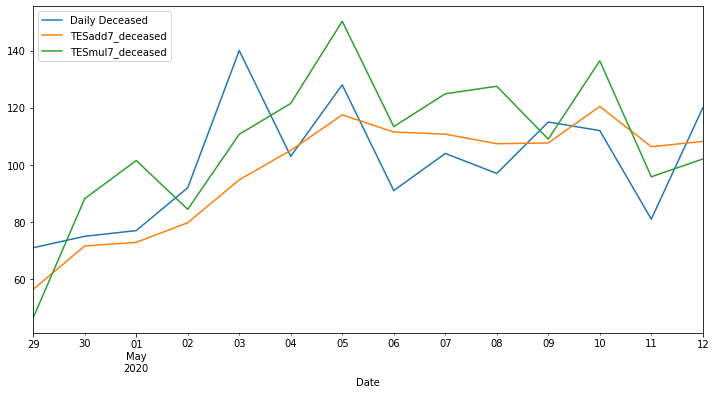

In [264]:
df1['TESmul7_deceased'] = ExponentialSmoothing(df1['Daily Deceased'],trend='mul',seasonal='mul',seasonal_periods=7).fit().fittedvalues
df1[['Daily Deceased','TESadd7_deceased','TESmul7_deceased']].iloc[-14:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Testing for stationarity of deceased data.

In [265]:
adf_test(df1['Daily Deceased'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -0.357193
p-value                  0.917004
# lags used              1.000000
# observations          50.000000
critical value (1%)     -3.568486
critical value (5%)     -2.921360
critical value (10%)    -2.598662
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [266]:
df1['d1_deceased'] = diff(df1['Daily Deceased'],k_diff=1)

adf_test(df1['d1_deceased'],'')

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.382221e+01
p-value                 7.867158e-26
# lags used             0.000000e+00
# observations          5.000000e+01
critical value (1%)    -3.568486e+00
critical value (5%)    -2.921360e+00
critical value (10%)   -2.598662e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [267]:
# Auto Arima Model

stepwise_model = auto_arima(train['Daily Deceased'], start_p=0, start_q=0, max_p=5, max_q=5,m=7,seasonality=True,
d=1,D=1,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

print(stepwise_model.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=333.713, BIC=340.367, Fit time=0.088 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=337.083, BIC=340.410, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=325.720, BIC=332.374, Fit time=0.100 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=320.381, BIC=327.035, Fit time=0.080 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=322.336, BIC=330.654, Fit time=0.125 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=325.425, BIC=330.416, Fit time=0.040 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=322.190, BIC=330.508, Fit time=0.149 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=323.860, BIC=333.842, Fit time=0.288 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=322.089, BIC=330.407, Fit time=0.117 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7);

In [268]:
model = SARIMAX(train['Daily Deceased'],order=(0,1,1),seasonal_order=(0,1,1,7),enforce_invertibility=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                    Daily Deceased   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -157.041
Date:                           Wed, 13 May 2020   AIC                            320.081
Time:                                   07:27:58   BIC                            325.072
Sample:                               03-22-2020   HQIC                           321.872
                                    - 05-07-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5274      0.169     -3.125      0.002      -0.858      -0.197
ma.S.L7       -0.5639      0.328     -1.719      0.086      -1.207       0.079
sigma2       170.4176     30.062      5.669      0.000     111.496     229.339
===================================================================================
Ljung-Box (Q):                       23.33   Jarque-Bera (JB):                25.16
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.52   Skew:                             0.96
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [269]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False,typ='levels').rename('SARIMA(0,1,1)(0,1,1,7) Predictions')

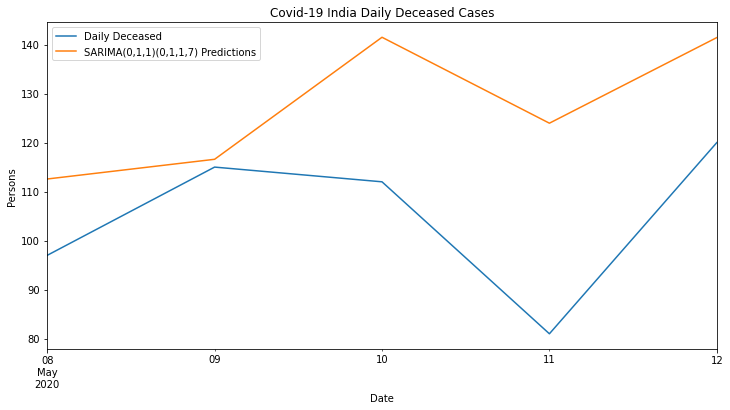

In [270]:
title='Covid-19 India Daily Deceased Cases'
ylabel='Persons'

ax = test['Daily Deceased'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [271]:
np.sqrt(mean_squared_error(test['Daily Deceased'], predictions))

26.14731732046255

Predicting for one week ahead.

In [272]:
model = SARIMAX(df1['Daily Deceased'],order=(0,1,1),seasonal_order=(0,1,1,7),enforce_invertibility=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                    Daily Deceased   No. Observations:                   52
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -178.850
Date:                           Wed, 13 May 2020   AIC                            363.699
Time:                                   07:27:58   BIC                            369.052
Sample:                               03-22-2020   HQIC                           365.684
                                    - 05-12-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4975      0.147     -3.390      0.001      -0.785      -0.210
ma.S.L7       -0.6830      0.169     -4.039      0.000      -1.014      -0.352
sigma2       178.6823     31.308      5.707      0.000     117.320     240.045
===================================================================================
Ljung-Box (Q):                       32.87   Jarque-Bera (JB):                15.77
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               4.89   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [273]:
start=len(df1)
end=len(df1)+5
predictions = results.predict(start=start, end=end, dynamic=False,typ='levels').rename('SARIMA(0,1,1)(0,1,1,7) Predictions')

In [274]:
predictions

2020-05-13     98.931015
2020-05-14    107.401472
2020-05-15    107.670055
2020-05-16    115.689974
2020-05-17    128.027112
2020-05-18    108.833186
Freq: D, Name: SARIMA(0,1,1)(0,1,1,7) Predictions, dtype: float64

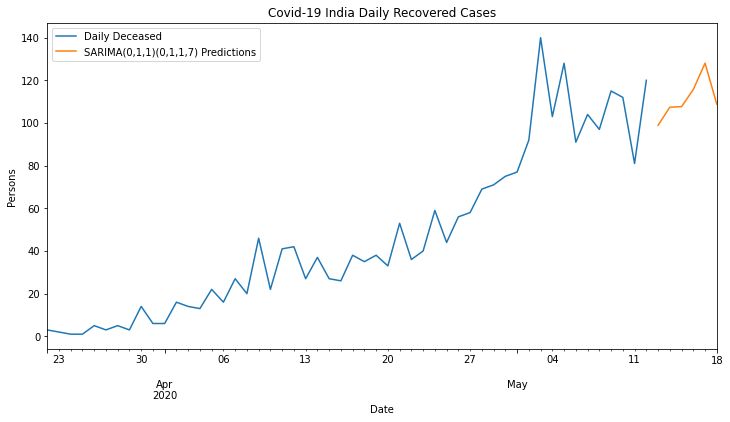

In [275]:
title='Covid-19 India Daily Recovered Cases'
ylabel='Persons'

ax = df1['Daily Deceased'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [276]:
date1 = '2020-01-30'
date2 = '2020-05-17'
mydates = pd.date_range(date1, date2).tolist()
len(mydates)

109

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2020-01-30 to 2020-05-12
Freq: D
Data columns (total 12 columns):
Daily Confirmed    104 non-null int64
Total Confirmed    104 non-null int64
Daily Recovered    104 non-null int64
Total Recovered    104 non-null int64
Daily Deceased     104 non-null int64
Total Deceased     104 non-null int64
EWMA5              104 non-null float64
SES5               103 non-null float64
DESadd5            103 non-null float64
TESadd5            104 non-null float64
d1                 103 non-null float64
d2                 102 non-null float64
dtypes: float64(6), int64(6)
memory usage: 15.6 KB


In [278]:
a=pd.DataFrame()
a['Date']=mydates
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 1 columns):
Date    109 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1000.0 bytes


In [279]:
a.index=a['Date']
a.drop(['Date'],axis=1,inplace=True)

a['Deceased']=df['Daily Deceased']
a['Total Deceased']=df['Total Deceased']
a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2020-01-30 to 2020-05-17
Data columns (total 2 columns):
Deceased          104 non-null float64
Total Deceased    104 non-null float64
dtypes: float64(2)
memory usage: 2.6 KB


In [280]:
a=a.round()

a.loc[104:,'Deceased']=predictions

a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2020-01-30 to 2020-05-17
Data columns (total 2 columns):
Deceased          109 non-null float64
Total Deceased    104 non-null float64
dtypes: float64(2)
memory usage: 2.6 KB


In [281]:
a=a.reset_index()
for i in range(5):
    a.loc[104+i,'Total Deceased']=a.loc[104+i-1,'Total Deceased']+a.loc[104+i,'Deceased']
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
Date              109 non-null datetime64[ns]
Deceased          109 non-null float64
Total Deceased    109 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.7 KB


In [282]:
a=a.round()
a.tail()

,Date,Deceased,Total Deceased
104,2020-05-13,99.0,2513.0
105,2020-05-14,107.0,2620.0
106,2020-05-15,108.0,2728.0
107,2020-05-16,116.0,2844.0
108,2020-05-17,128.0,2972.0


# From ARIMA model total deceased cases would be 2972 approximately by 17/05/2020.